# Explore the Relationship between  School's Education Quality and Future Crime Rate


# Project One 

## Introducation

In the effort to unravel the complex relationship between the quality of education and crime rates across the United States, this research conducts a thorough analysis, tackling the obstacles created by the lack of specific annual data for schools. Given the logistical ease of mapping and the wider availability of state-level data, the study expands beyond basic statistics to discover patterns and connections that could illuminate the grasp of public safety and the significance of education.

At the core of the examination, the crime rate in each state acts as an indicator of safety and well-being. This key variable, contrasted with a range of independent factors—from crime types (split into fatal and nonfatal) and school types (private versus public), to the intricacies of student-to-school ratios and economic metrics like GDP per capita and spending per student—provides a rich view of the socio-economic environment(Burdick-Will, 2013).

Investigating these links, especially the impact of student-to-school ratios on educational quality and their association with crime data, aims to highlight a possible connection between education levels and crime occurrences(Burdick-Will, 2013). This careful analysis recognizes that merely counting schools within a state offers an incomplete picture. Instead, it's the combination of demographic and economic factors, such as GDP per capita and investment in students, that truly informs the understanding(Cook et al. (2010).

Additionally, the study utilizes web scraping to collect information on K-12 education spending per student from a site recommended by experts, offering greater depth to the assessment of educational funding across states(Ramirez et al., 2011). Navigating the complexities of web data to extract relevant information presents its own set of challenges, demanding accurate and focused efforts to ensure the data's relevance and usefulness.

The results, illustrated through various visual aids and maps, underscore the relationship between the quality of education—measured by expenditure per student—and crime rates. Applying color codes to map states by their 'value' ratio (the balance of school availability to crime rates) constructs a persuasive story, reinforcing the theory of a link between educational standards and crime levels(McCall et al., 2012).

This introduction prepares the ground for a detailed exploration of how educational systems and public safety interconnect across the United States. With this research, the venture is to comprehend the wider effects of investment in education and its capability to improve community welfare. I think this research is meaningful.

### set up the varibale

#### <span style="color:red">  I chose to work with state-level data because it's more feasible to map all states than to map counties or zip codes. Moreover, state-level data tends to be more readily available, supporting my research with ample information. However, I will use county_level data for regression to get more informative models.

In this study, the dependent variable (Y) is the crime rate in each county, which is  an indicator of the county's safety level. Finding out this economic facts about the crime rate is important and valuable due to it can help improve the well-being of all citizens.

The independent variables (X) include:

Public_PTR: It stands for the pupil-teacher ratio in public schools. I set this for evaluating the educational quality. This is an indicator.  

Private_PTR: To investigate the potential differences in impact on local crime rates between private and public schools, I include both 'Public_PTR' and 'Private_PTR' as separate x variables. This differentiation aims to explore the roles that educational institutions play in helping societal safety. To figure it out which is better on influencing crime rate.

Income per capita: This variable is included as a controller in the regression analysis. Income levels have a considerable influence on crime rates, particularly non-fatal crimes such as theft.

Median household income: I also consider median household income to ensure comparisons between counties of similar economic statuses, as counties with lower median household income possibly have higher crime rates.

Unemployment rate: As another control variable(x), the unemployment rate is included based on it can significantly affect local crime rates.

This comprehensive approach incorporating economic dimensions allows for a more detailed exploration of the factors influencing crime rates across different counties.This study can evaluate and underscore the importance of the quality of education by revealing how PTR affect the future local crime rate. 

## Merge other datasets

#### I have merged the each state's crime rate data (TAS, 2022). This is for our Y variable.

TAS, N. (2022, January 1). United States Crime. Www.kaggle.com. https://www.kaggle.com/datasets/nuritasthedataist/united-states-crime


In [1]:
import pandas as pd
# Load the datasets
crime = pd.read_csv('state_crime.csv')

## Data Cleaning/Loading

#### clean data first, remove some useless columns, then get number of students and teachers in each state.

In [2]:
import pandas as pd
# Load the datasets
private_data = pd.read_csv('Private_Schools.csv')
public_data = pd.read_csv('Public_Schools.csv')
private_filtered = private_data[(private_data['FT_TEACHER'] > 0) & (private_data['ENROLLMENT'] > 0)].copy()
public_filtered = public_data[(public_data['FT_TEACHER'] > 0) & (public_data['ENROLLMENT'] > 0)].copy()

# Safely calculate the student per teacher ratio using .loc
private_filtered.loc[:, 'PTR'] = private_filtered['ENROLLMENT'] / private_filtered['FT_TEACHER']
public_filtered.loc[:, 'PTR'] = public_filtered['ENROLLMENT'] / public_filtered['FT_TEACHER']

# Proceed with the rest of the calculations
avg_private_spt_state = private_filtered.groupby('STATE')['PTR'].mean().reset_index(name='Private_PTR')
avg_public_spt_state = public_filtered.groupby('STATE')['PTR'].mean().reset_index(name='Public_PTR')

# Merge and fill missing values
ptr_state = pd.merge(avg_private_spt_state, avg_public_spt_state, on='STATE', how='outer')
ptr_state.fillna(0, inplace=True)

In [3]:
# State abbreviations dictionary
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC', 'American Samoa': 'AS', 'Guam': 'GU',
    'Northern Mariana Islands': 'MP', 'Puerto Rico': 'PR', 'U.S. Virgin Islands': 'VI'
}
# Filter the data for the year 2018 and select only the relevant columns
crime_2018 = crime[crime['Year'] == 2018][['STATE', 'Data.Rates.Property.All', 'Data.Rates.Violent.All']].copy()
# Rename the columns for property and violent crime rates and the State column to abbreviations
crime_2018.rename(columns={
    'Data.Rates.Property.All': 'nonfatal crime rate',  # New name for Property Crime Rate
    'Data.Rates.Violent.All': 'fatal crime rate'       # New name for Violent Crime Rate
}, inplace=True)
# Replace full state names with abbreviations using the state_abbreviations dictionary
crime_2018['STATE'] = crime_2018['STATE'].map(state_abbreviations)
# Drop any rows that didn't match the state abbreviations (i.e., if any 'State' is NaN)
crime_2018.dropna(subset=['STATE'], inplace=True)

## Summary Statistics Tables

The first two summary tables present the pupil-teacher ratios (PTR) for public and private schools across all states and counties. I set the PTR as an indicator of the quality of education. The third table compiles crime rates for each state.(Interpretation): in the following, I can use these two data to compare. If most of the state has high PTR(bad educational quality) with high crime rate or low PTR (good educational quality) with low crime rate. This will reflect an correlation and it is related to our research topic. 

In [4]:
ptr_state.head(10)

,STATE,Private_PTR,Public_PTR
0,AK,8.365722,17.486594
1,AL,9.845521,18.716610
2,AR,8.825261,13.669028
3,AZ,9.984455,18.458963
4,CA,10.683620,22.828242
5,CO,9.252550,17.765638
6,CT,8.040260,13.790649
7,DC,7.661476,16.232906
8,DE,10.165393,15.092346
9,FL,10.133317,17.218593


In [5]:
# Calculate the average PTR for each county in the private and public datasets
avg_private_ptr_county = private_filtered.groupby(['STATE', 'COUNTY'])['PTR'].mean().reset_index(name='Private_PTR')
avg_public_ptr_county = public_filtered.groupby(['STATE', 'COUNTY'])['PTR'].mean().reset_index(name='Public_PTR')
# Merge the private and public school averages by county
ptr_county = pd.merge(avg_private_ptr_county, avg_public_ptr_county, on=['STATE', 'COUNTY'], how='outer')
# Fill missing values with 0 (for counties with data missing from either dataset)
ptr_county.fillna(0, inplace=True)
ptr_county.head()

,STATE,COUNTY,Private_PTR,Public_PTR
0,AK,ANCHORAGE,10.386080,20.938255
1,AK,BRISTOL BAY,3.000000,14.750000
2,AK,DILLINGHAM,9.000000,9.923232
3,AK,FAIRBANKS NORTH STAR,9.006111,29.879588
4,AK,JUNEAU,6.023810,15.265764


In [6]:
crime_2018.head()

,STATE,nonfatal crime rate,fatal crime rate
58,AL,2817.2,519.6
118,AK,3300.5,885.0
178,AZ,2676.8,474.9
238,AR,2913.0,543.6
298,CA,2380.4,447.4


### Plots, Histograms, Figures

#### Figure 1 and Figure 2: Due to I didn't have access to the year-specific data in the original school dataset, I was unable to analyze the growth rate of the number of schools and crimes directly. Instead, I decided to highlight certain trends by showcasing the top 15 states with the highest nonfatal crime rates and comparing them with the states that have the highest PTR. Look at first two plots together,  it's interesting to observe that some states appear on both the high crime and high population per school lists. (Interpretation): This approach was taken to hint at a possible relationship between the quality of schools and crime rates, suggesting that worse education might be associated with higher crime rates.  However, due to the limitations of showcasing all states in these plots, I plan to employ a more sophisticated and clear method to demonstrate this correlation in project two

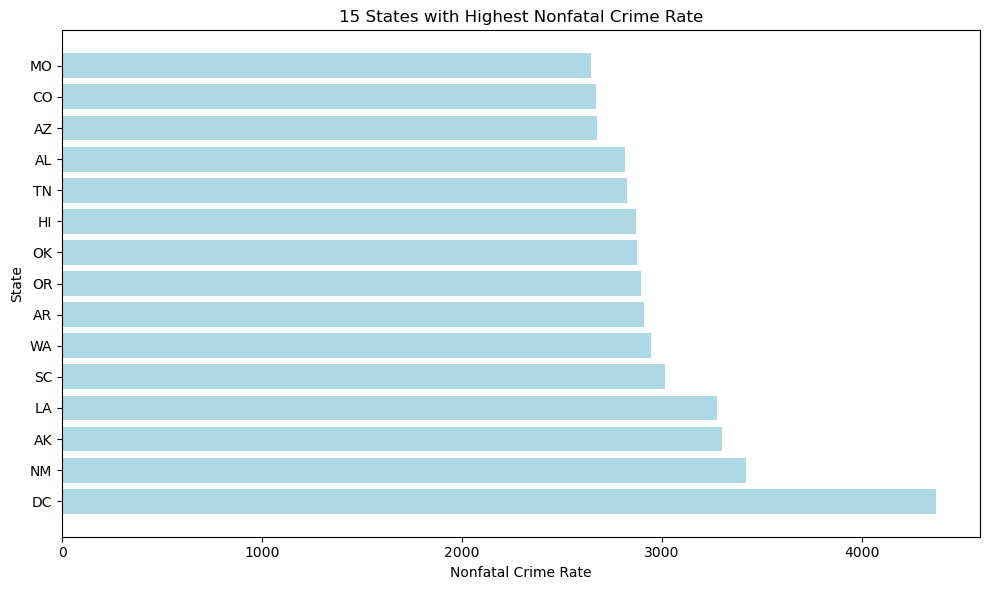

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
# Find the top 10 states with the highest nonfatal crime rate
top10_nonfatal_crime_states = crime_2018.nlargest(15, 'nonfatal crime rate')
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top10_nonfatal_crime_states['STATE'], top10_nonfatal_crime_states['nonfatal crime rate'], color='lightblue')
plt.xlabel('Nonfatal Crime Rate')
plt.ylabel('State')
plt.title('15 States with Highest Nonfatal Crime Rate')
plt.tight_layout()
plt.show()

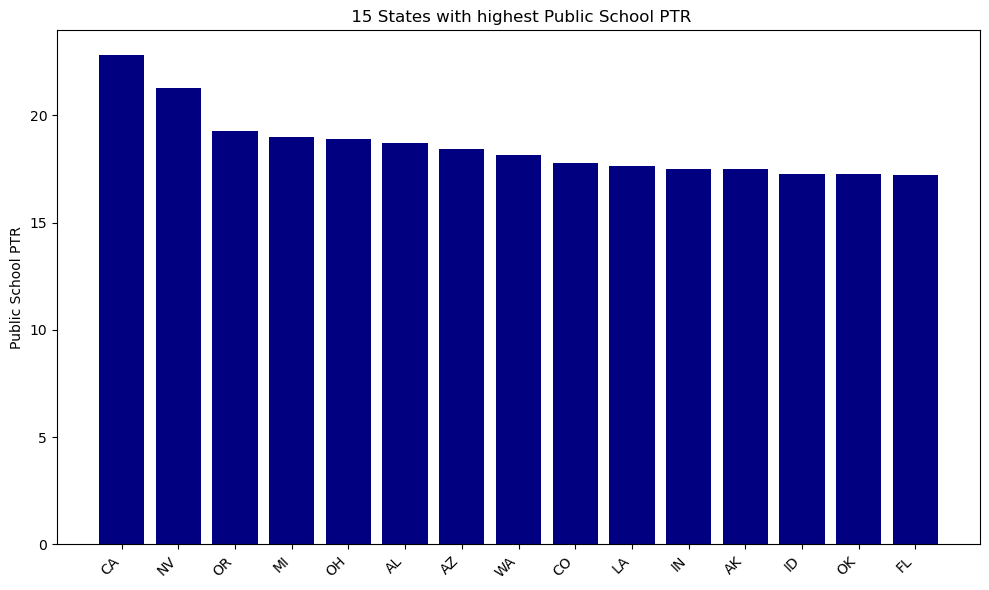

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
# Filter out states where Public_PTR is 0
ptr_state_filtered = ptr_state[ptr_state['Public_PTR'] > 0]
# Find the top 10 states with the lowest non-zero public PTR
lowest10_public_ptr_states = ptr_state_filtered.nlargest(15, 'Public_PTR')
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(lowest10_public_ptr_states['STATE'], lowest10_public_ptr_states['Public_PTR'], color='navy')
plt.ylabel('Public School PTR')
plt.title(' 15 States with highest Public School PTR')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

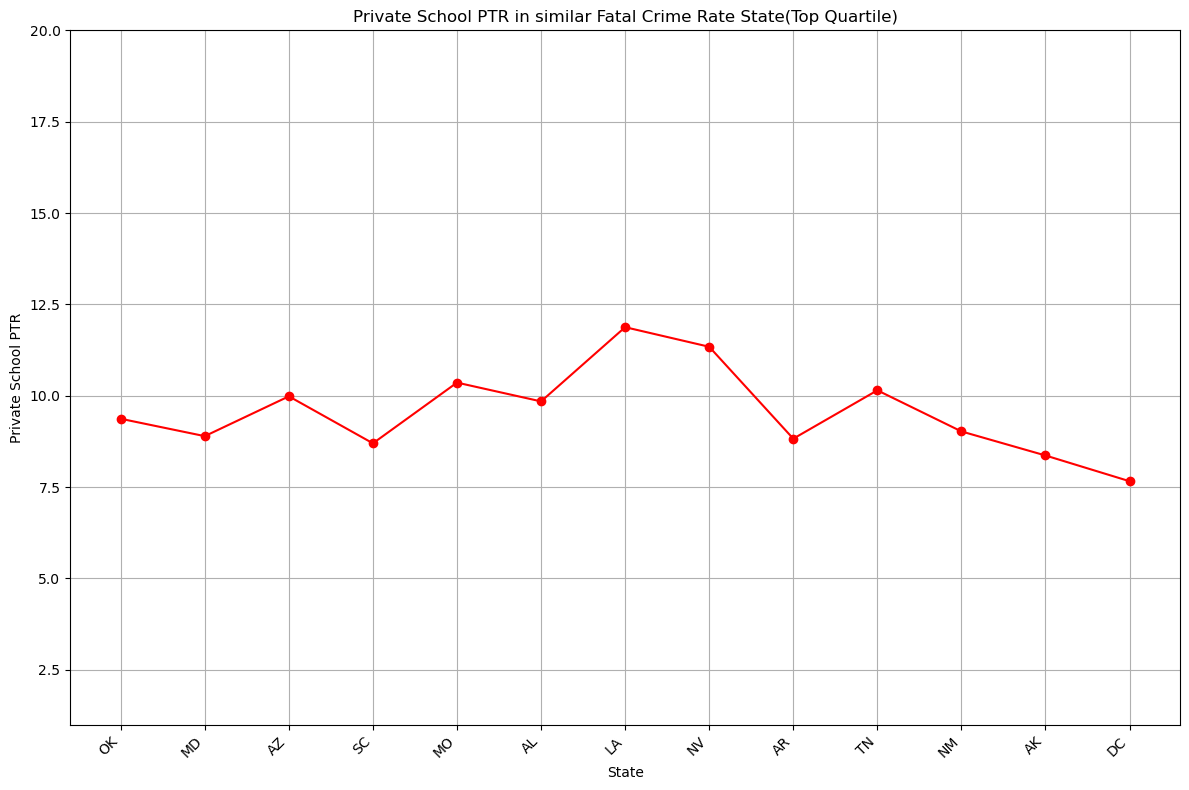

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
# Criteria: States in the top quartile of fatal crime rates, sorted by rate
threshold_fatal = crime_2018['fatal crime rate'].quantile(0.75)
top_fatal_crime_states = crime_2018[crime_2018['fatal crime rate'] >= threshold_fatal].sort_values('fatal crime rate')
# Merge and prepare data
merged_data_fatal_ptr = pd.merge(top_fatal_crime_states, ptr_state[['STATE', 'Private_PTR']], on='STATE')
# Determine the range for Y-axis based on PTR values to enhance visibility
min_ptr, max_ptr = merged_data_fatal_ptr['Private_PTR'].min(), merged_data_fatal_ptr['Private_PTR'].max()
ptr_range = max_ptr - min_ptr
y_min = max(0, min_ptr - ptr_range * 0.1)  # Extend lower limit by 10% of range if not negative
y_max = max_ptr + ptr_range * 0.1  # Extend upper limit by 10% of range
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(merged_data_fatal_ptr['STATE'], merged_data_fatal_ptr['Private_PTR'], marker='o', linestyle='-', color='red')
plt.xlabel('State')
plt.ylabel('Private School PTR')
plt.title('Private School PTR in similar Fatal Crime Rate State(Top Quartile)')
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.ylim(1, 20)  # Adjust y-axis to make PTR differences more visible
plt.tight_layout()
plt.show()

#### Figure 3  is designed to explore the relationship between pupil-teacher ratios (PTR) and crime rates within states that have similar crime rate. By examining the variation in PTR within the narrowly defined crime rate , it can show if there is a consistent pattern that suggests an influence of educational quality (as inferred from PTR) on crime rates. From the plot above, we can see PTR's range is only spanning from 7.5 to 12.5. The variation is small which means the states have similar crime rate also have similar PTR. This narrow range clearly demonstrate my project topic. 

#### <span style="color:red"> Due to there are private PTR, public PTR, fatal crime rate, nonfatal crime rate. I can just choose one of them for x and y to create figure. I cannot choose all of them to create multiply plots for same meaning. 

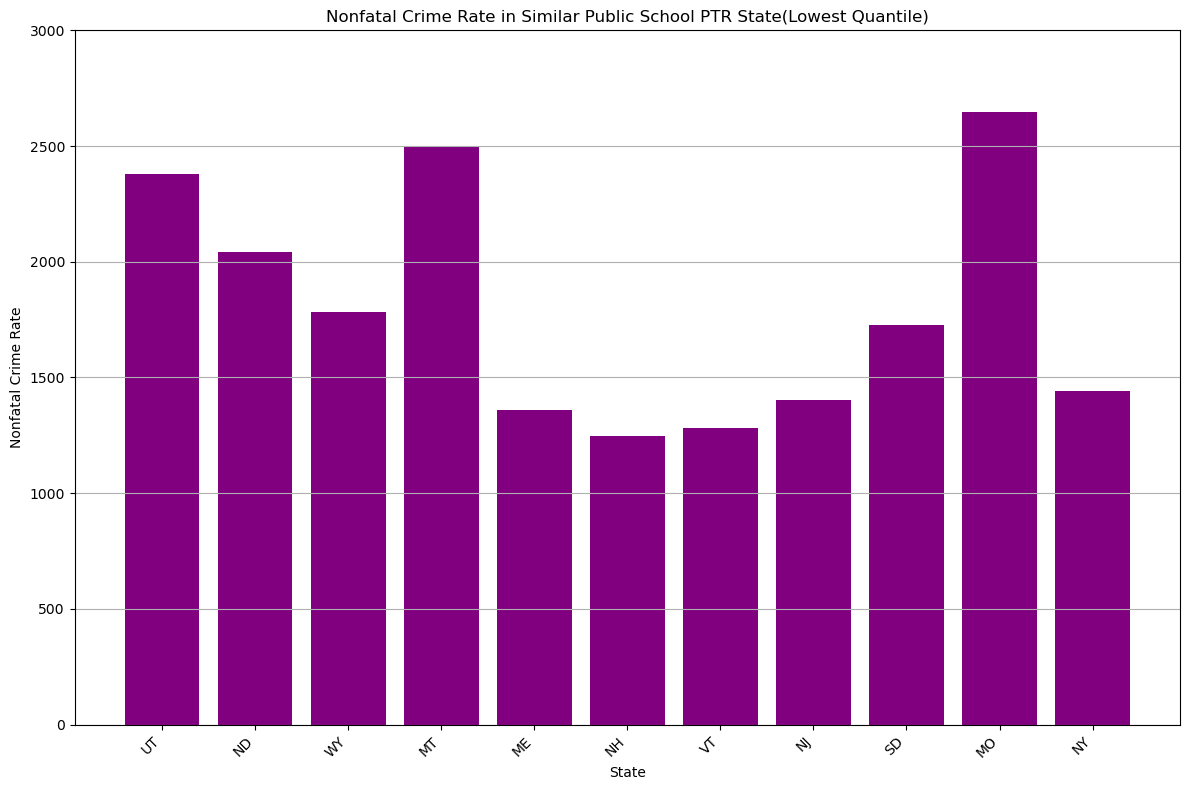

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
# Step 1: Identify states in the lowest quantile (25%) of public PTR
threshold_ptr_public = ptr_state['Public_PTR'].quantile(0.25)
low_ptr_public_states = ptr_state[ptr_state['Public_PTR'] <= threshold_ptr_public]
# Step 2: Merge the low public PTR data with crime_2019 data on the state
merged_data_low_public_ptr_crime = pd.merge(low_ptr_public_states, crime_2018[['STATE', 'nonfatal crime rate']], on='STATE').sort_values('Public_PTR')
# Plotting - Bar plot for Nonfatal Crime Rate in States with Lowest Public School PTR
plt.figure(figsize=(12, 8))
plt.bar(merged_data_low_public_ptr_crime['STATE'], merged_data_low_public_ptr_crime['nonfatal crime rate'], color='purple')
plt.xlabel('State')
plt.ylabel('Nonfatal Crime Rate')
plt.title('Nonfatal Crime Rate in Similar Public School PTR State(Lowest Quantile)')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')
plt.ylim(0, 3000)
plt.tight_layout()
plt.show()

#### Figure 4: Conversely, I also want to investigate the variation in crime rates within states of similar PTR, to reinforce my hypothesis from another angle. Although the PTR range for this analysis is broader, making it a slightly more complex comparison, it can still support my assumption that educational quality can influence crime rates.

# Project Two

## Main Message

#### The relationship between school and crime: worse school quality with higher crime rate, vice verse.



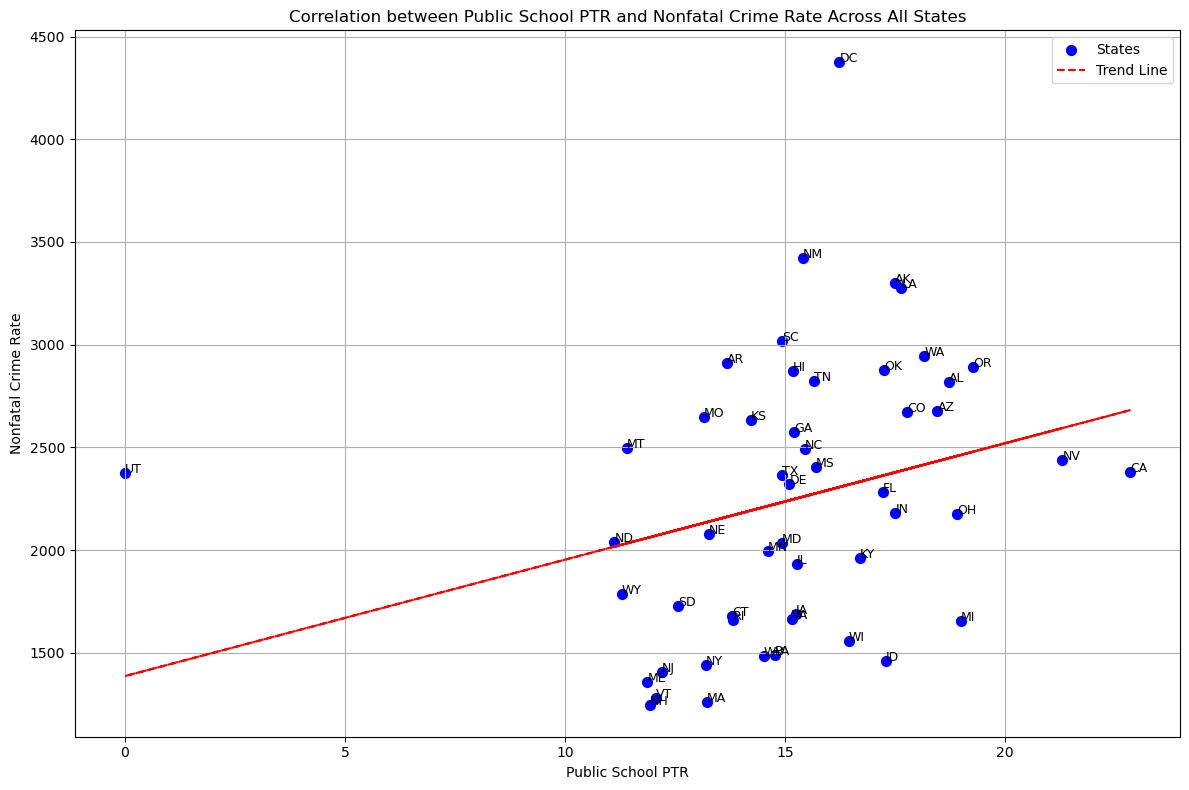

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Merge the PTR data with crime data on "STATE"
merged_data = pd.merge(ptr_state[['STATE', 'Public_PTR']], crime_2018[['STATE', 'nonfatal crime rate']], on='STATE')
# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(
    merged_data['Public_PTR'],
    merged_data['nonfatal crime rate'],
    color='blue', s=50, label='States'
)
# Add "STATE" annotations next to each point
for idx, row in merged_data.iterrows():
    plt.text(
        row['Public_PTR'], 
        row['nonfatal crime rate'], 
        row['STATE'], fontsize=9
    )
# Optional: Calculate and plot the trend line
z = np.polyfit(
    merged_data['Public_PTR'],
    merged_data['nonfatal crime rate'], 1
)
p = np.poly1d(z)
plt.plot(
    merged_data['Public_PTR'],
    p(merged_data['Public_PTR']),
    "r--", label='Trend Line'
)
plt.title('Correlation between Public School PTR and Nonfatal Crime Rate Across All States')
plt.xlabel('Public School PTR')
plt.ylabel('Nonfatal Crime Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Ensure a clean layout
plt.show()

#### <span style="color:red"> Due to there are private PTR, public PTR, fatal crime rate, nonfatal crime rate. I can just choose one of them for x and y to create plots. I cannot choose all of them to create multiply plots for same meaning. So, for this plot, I choose nonfatal crime rate and public school PTR due to they are more more representative. 
    
The plot above illustrates the relationship between the educational quality of public schools and the nonfatal crime rate in various states, with each state represented by a blue dot. It charts the quality of public schools on X axis and the nonfatal crime rate on Y axis, allowing us to trace a trend line through these points. Observing that the slope of the trend line is upward indicates a clear pattern: states with high public scholl PTR tend to have higher nonfatal crime rates. This visual evidence supports the main message of my analysis, suggesting a link between the quality of education and crime rates across the states.

## Maps and Interpretations

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
# Merge the data on the 'STATE' column
merged_data = ptr_state.merge(crime_2018, on='STATE')
# Calculate the new value columns based on PTR and crime rates
merged_data['value 1(public PTR / fatal crime)'] = merged_data['Public_PTR'] / merged_data['fatal crime rate']
merged_data['value 2(public PTR / nonfatal crime)'] = merged_data['Public_PTR'] / merged_data['nonfatal crime rate']
merged_data['value 3(private PTR / fatal crime)'] = merged_data['Private_PTR'] / merged_data['fatal crime rate']
merged_data['value 4(private PTR / nonfatal crime)'] = merged_data['Private_PTR'] / merged_data['nonfatal crime rate']
# Prepare the final table for mapping
final_table = merged_data[['STATE', 'value 1(public PTR / fatal crime)', 'value 2(public PTR / nonfatal crime)', \
'value 3(private PTR / fatal crime)', 'value 4(private PTR / nonfatal crime)']]
final_table.head()

,STATE,value 1(public PTR / fatal crime),value 2(public PTR / nonfatal crime),value 3(private PTR / fatal crime),value 4(private PTR / nonfatal crime)
0,AK,0.019759,0.005298,0.009453,0.002535
1,AL,0.036021,0.006644,0.018948,0.003495
2,AR,0.025145,0.004692,0.016235,0.003030
3,AZ,0.038869,0.006896,0.021024,0.003730
4,CA,0.051024,0.009590,0.023879,0.004488


### <span style="color:red">Interpretation for all following maps:
    
The table above, I've created a ratio called 'value' by dividing PTR by crime rate, based on data from each state. This approach is designed to quantify the relationship between PTR and the crime rate within each town. Our hypothesis suggests that a higher PTR correlates with a higher crime rate, and vice versa. Essentially, if a state's 'value'—derived from this calculation—is close to the median value across all states, it supports our assumption.

To visually represent this data, I created four maps, coloring each state based on how its 'value' compares to the median. States with values close to the median are colored navy, indicating a direct correlation between school populations and crime rates as per our hypothesis. States that deviate more significantly from the median are marked in red or yellow. The prevalence of navy across all maps further validates our initial hypothesis, showing a significant correlation between the proportion of population per school and crime rates.
    
I know maybe it is hard to understand, I can write some examples. For instance, consider two hypothetical states, 'A' and 'B'. In state 'A', both a high PTR and a high crime rate, say 99 for both, would result in a 'value' of 1 (99 divided by 99). Similarly, in state 'B', a low PTR and a low crime rate, both being 1, would also lead to a 'value' of 1 (1 divided by 1). If high PTR with a low crime rate or low PTR with high crime rate. The value will be much large or much small. 
    
And how to define the average? I just get all value's mean(not median! it is important). For instance, all states' value is 0 or 10. The mean is 5( I set 5 as navy color). Although I just use average to set the color, there will be no navy in the following maps. 

In [15]:
# Load US States shapefile
state_map = gpd.read_file('tl_2019_us_state.shp')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


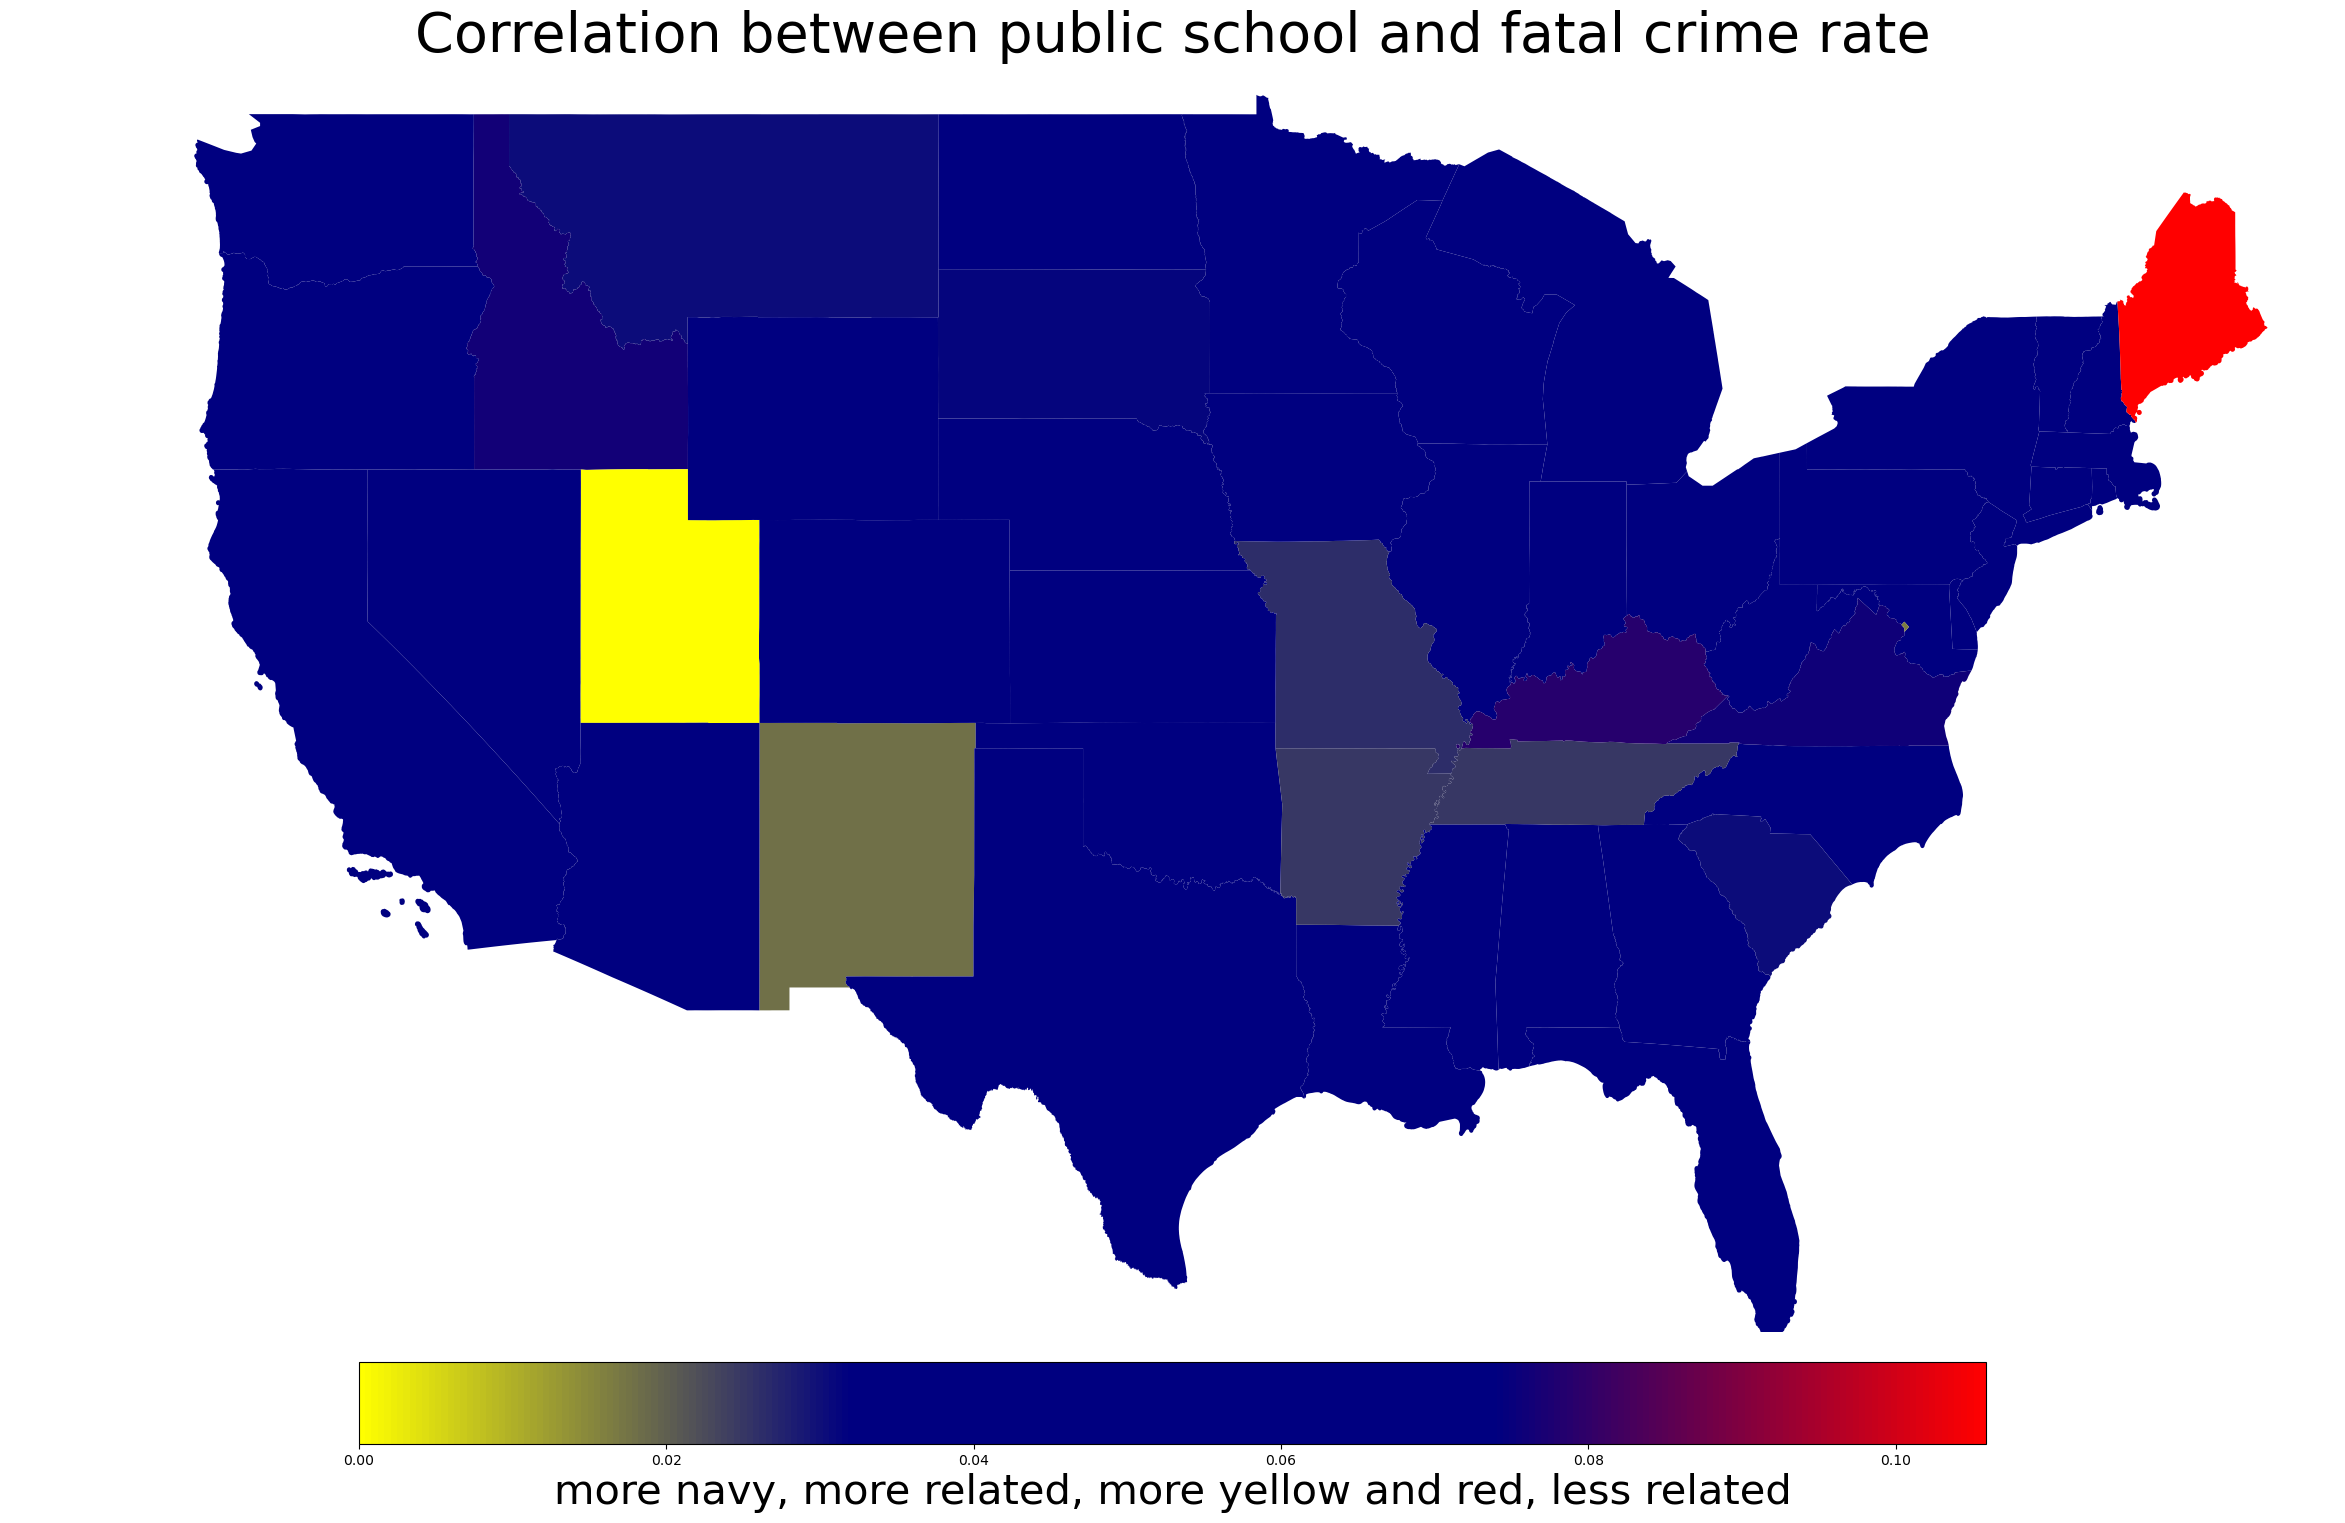

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
# Merge the dataframes
map_data_merged = state_map.merge(final_table, left_on='STUSPS', right_on='STATE')

cmap = colors.LinearSegmentedColormap.from_list(
    'custom_colormap', 
    [(0, 'yellow'), (0.3, 'navy'), (0.7, 'navy'), (1, 'red')], N=256
)
# Plot the map with a larger size
fig, ax = plt.subplots(1, figsize=(30, 20))
# Use the custom colormap
plot = map_data_merged.plot(column='value 1(public PTR / fatal crime)', ax=ax, cmap=cmap)
# Set the x and y axis limits to focus on the contiguous United States
ax.set_xlim([-130, -65])
ax.set_ylim([25, 50])
# Creating the colorbar using the figure and the plot object
# Increase the size of the colorbar
cbar = fig.colorbar(plot.get_children()[0], ax=ax, orientation='horizontal', shrink=0.7, aspect=20, pad=0.02)
cbar.set_label('more navy, more related, more yellow and red, less related', fontsize=30)
# Set the axis off
ax.set_axis_off()
# Set a title with a larger font size
plt.title('Correlation between public school and fatal crime rate', fontsize=40)
# Show the plot
plt.show()

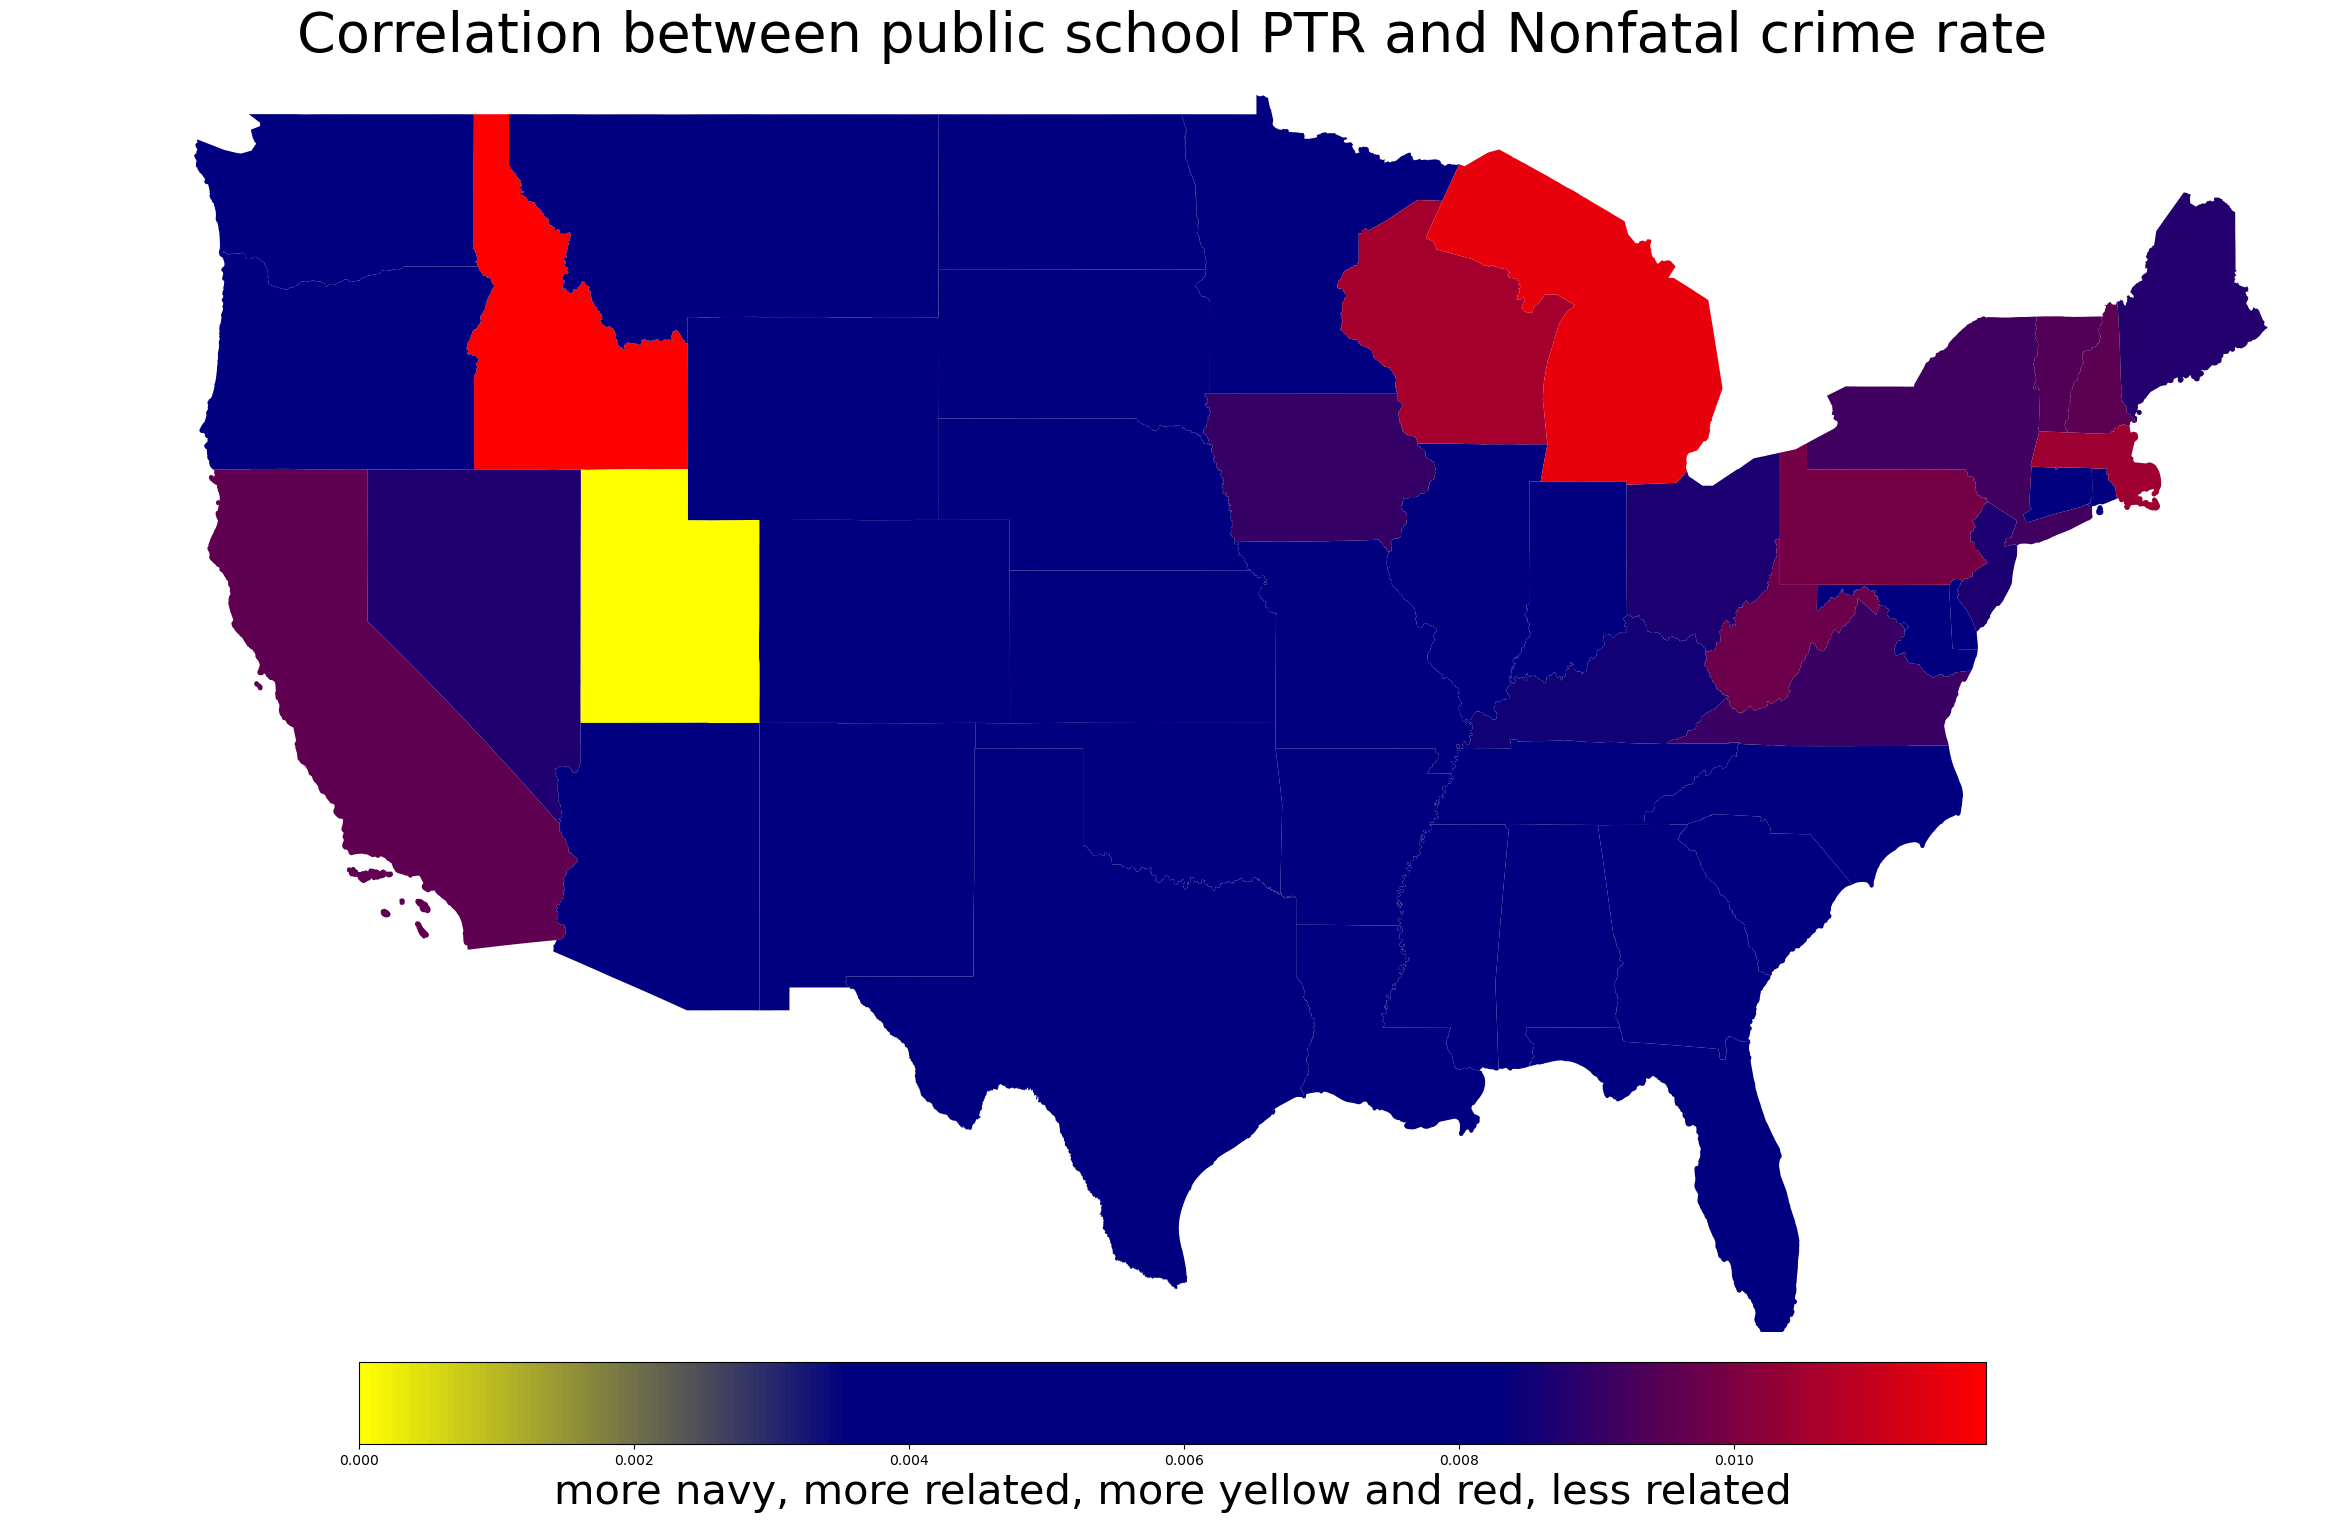

In [17]:
# Plot the map with a larger size
fig, ax = plt.subplots(1, figsize=(30, 20))
# Use the custom colormap
plot = map_data_merged.plot(column='value 2(public PTR / nonfatal crime)', ax=ax, cmap=cmap)
# Set the x and y axis limits to focus on the contiguous United States
ax.set_xlim([-130, -65])
ax.set_ylim([25, 50])
# Creating the colorbar using the figure and the plot object
# Increase the size of the colorbar
cbar = fig.colorbar(plot.get_children()[0], ax=ax, orientation='horizontal', shrink=0.7, aspect=20, pad=0.02)
cbar.set_label('more navy, more related, more yellow and red, less related', fontsize=30)
# Set the axis off
ax.set_axis_off()
# Set a title with a larger font size
plt.title('Correlation between public school PTR and Nonfatal crime rate', fontsize=40)
# Show the plot
plt.show()

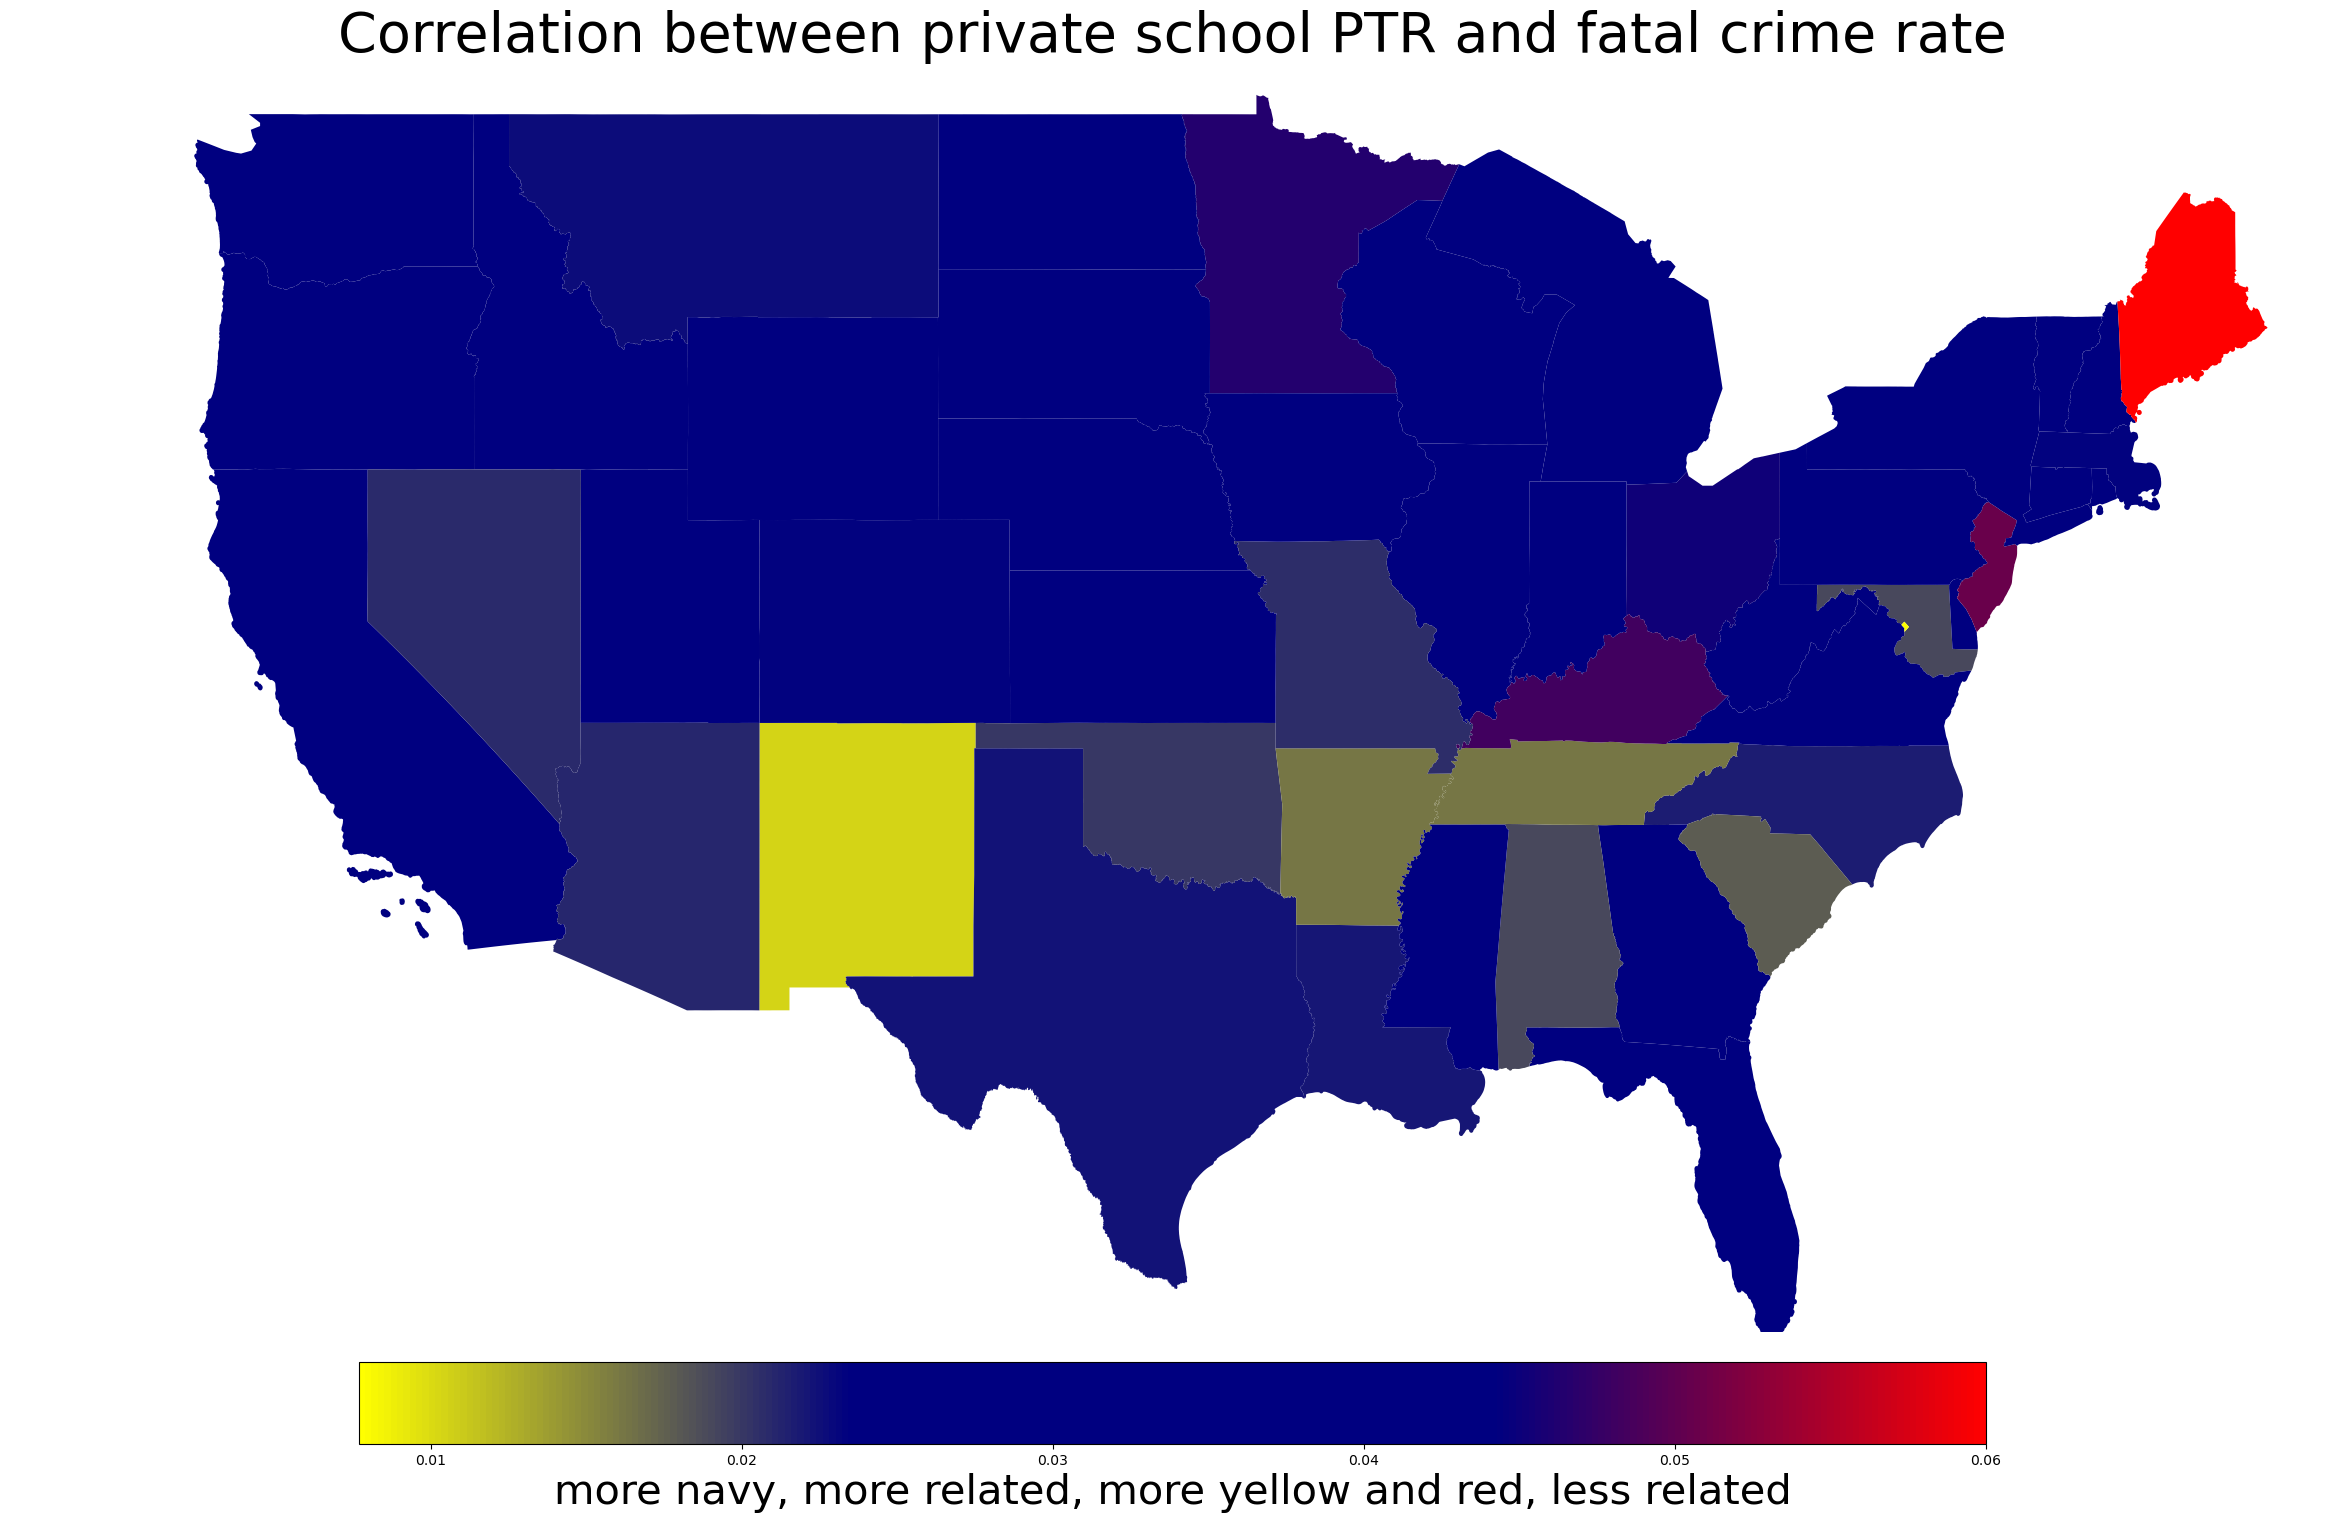

In [18]:
# Plot the map with a larger size
fig, ax = plt.subplots(1, figsize=(30, 20))
# Use the custom colormap
plot = map_data_merged.plot(column='value 3(private PTR / fatal crime)', ax=ax, cmap=cmap)
# Set the x and y axis limits to focus on the contiguous United States
ax.set_xlim([-130, -65])
ax.set_ylim([25, 50])
# Creating the colorbar using the figure and the plot object
# Increase the size of the colorbar
cbar = fig.colorbar(plot.get_children()[0], ax=ax, orientation='horizontal', shrink=0.7, aspect=20, pad=0.02)
cbar.set_label('more navy, more related, more yellow and red, less related', fontsize=30)
# Set the axis off
ax.set_axis_off()
# Set a title with a larger font size
plt.title('Correlation between private school PTR and fatal crime rate', fontsize=40)
# Show the plot
plt.show()

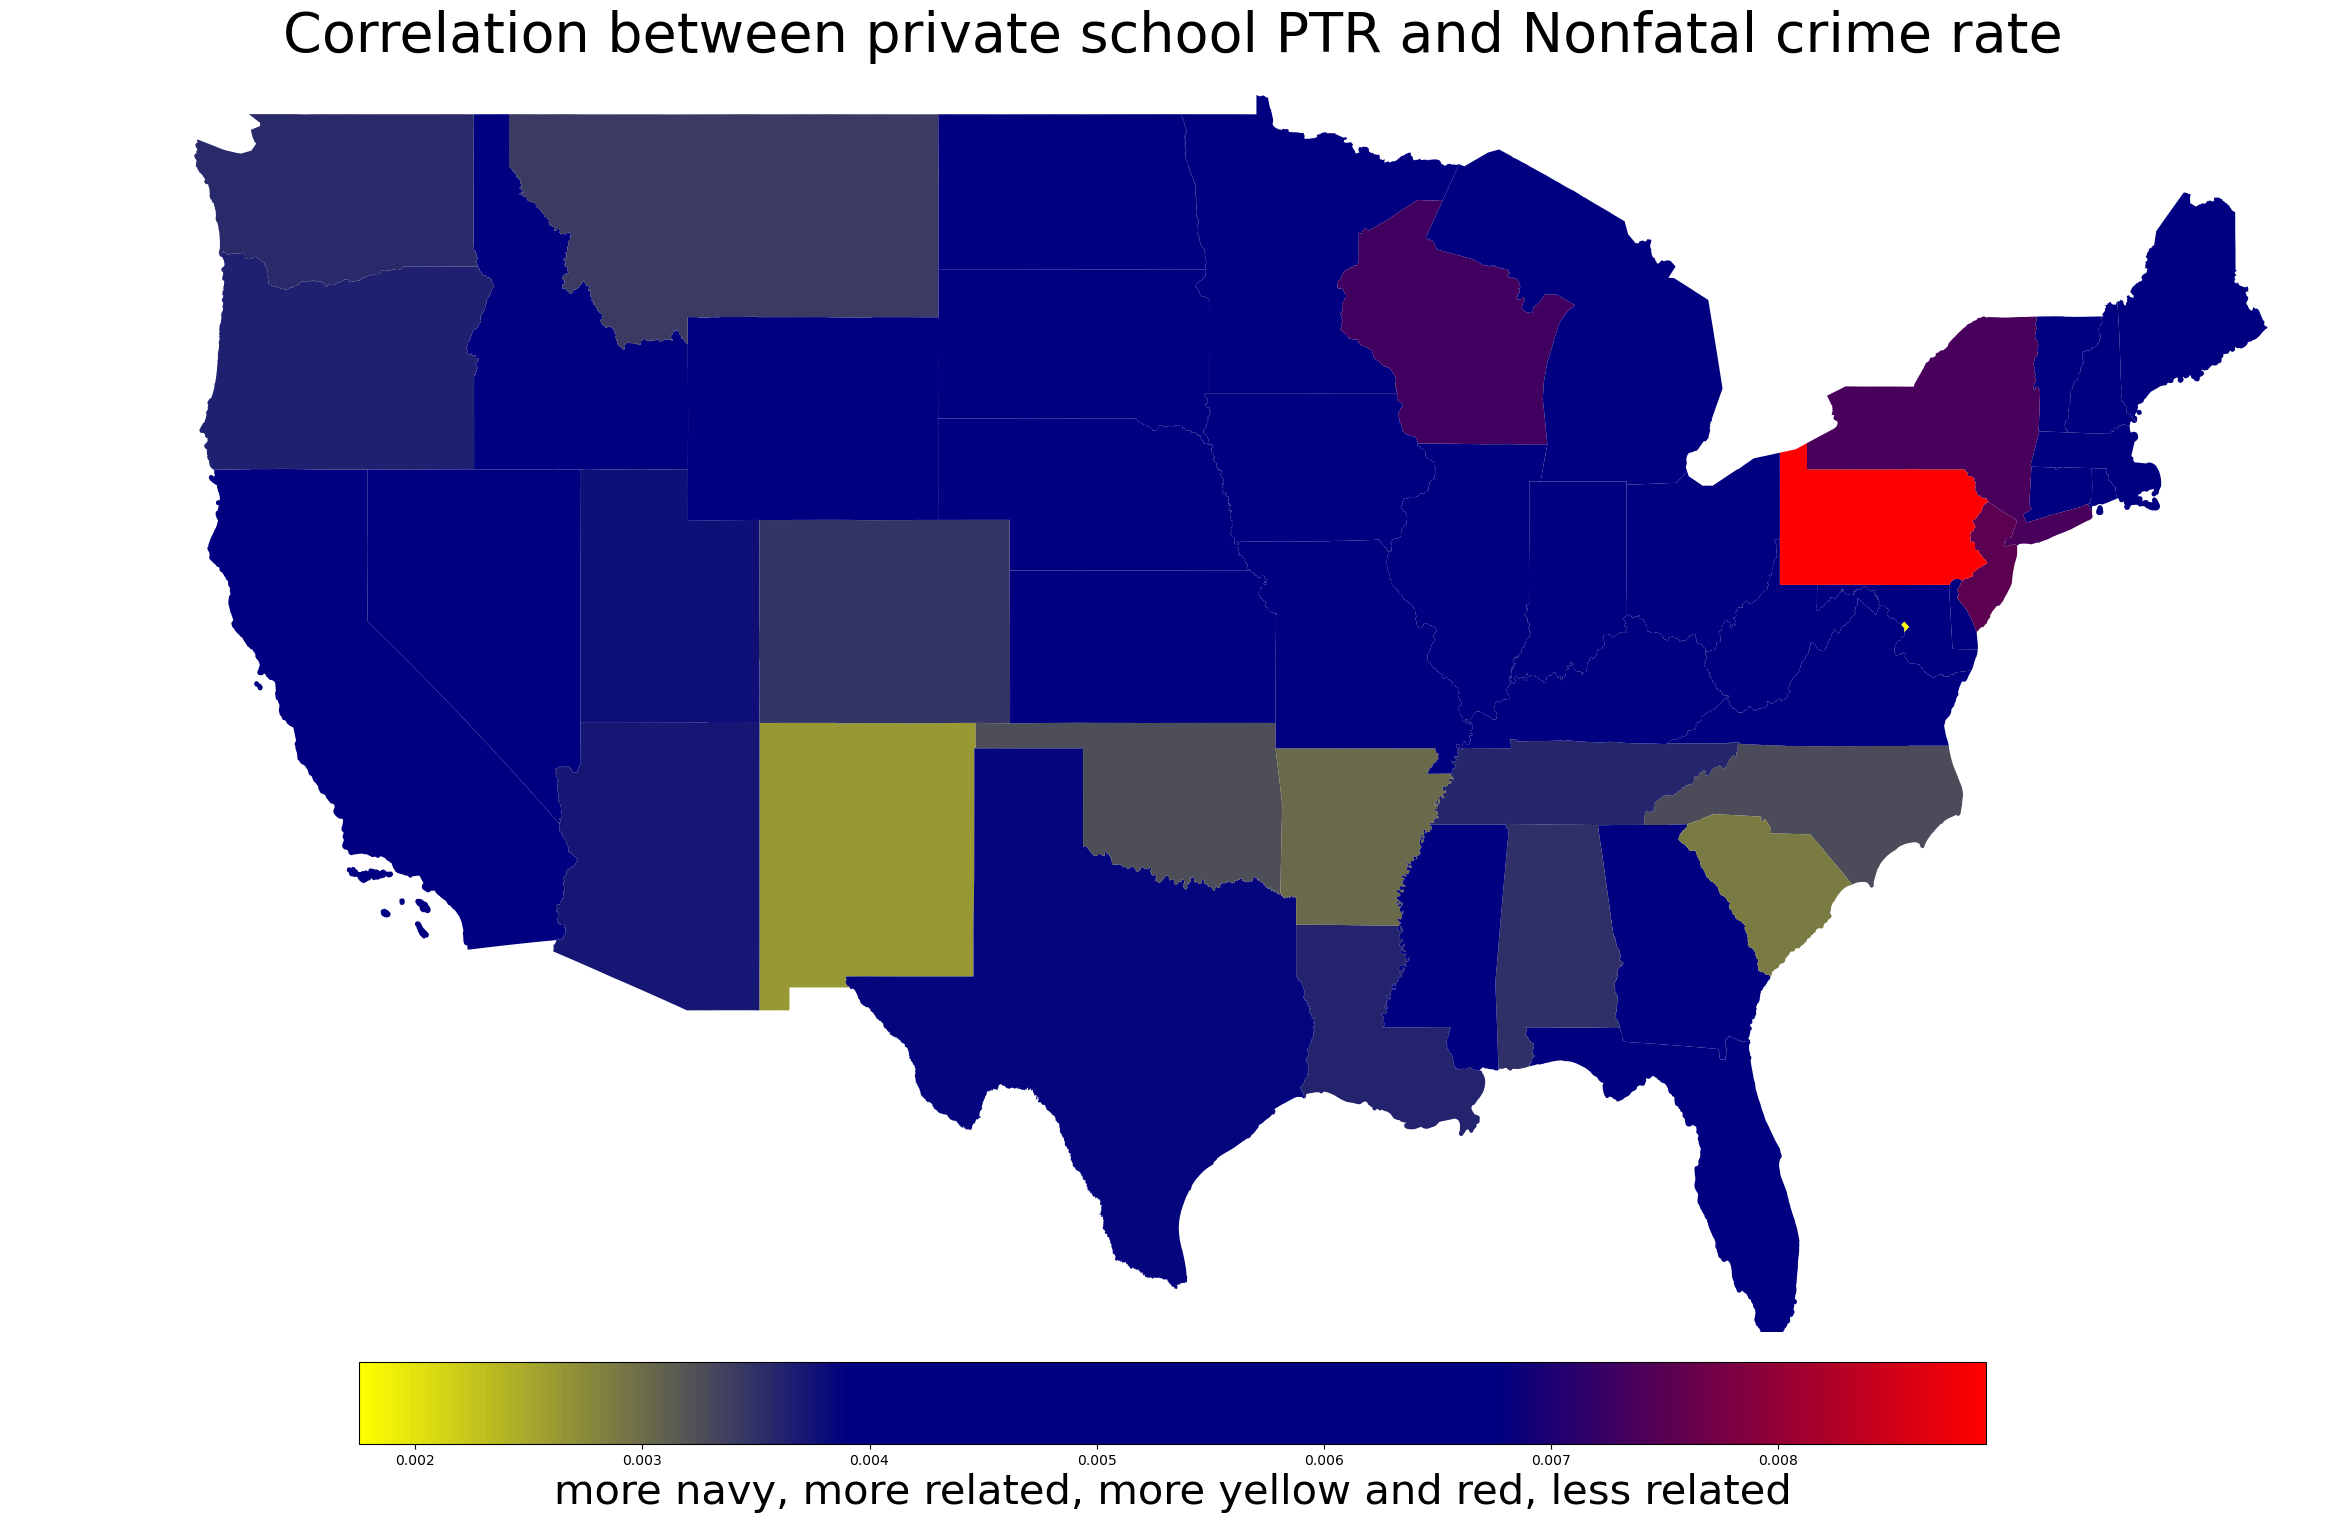

In [19]:
# Plot the map with a larger size
fig, ax = plt.subplots(1, figsize=(30, 20))
# Use the custom colormap
plot = map_data_merged.plot(column='value 4(private PTR / nonfatal crime)', ax=ax, cmap=cmap)
# Set the x and y axis limits to focus on the contiguous United States
ax.set_xlim([-130, -65])
ax.set_ylim([25, 50])
# Creating the colorbar using the figure and the plot object
# Increase the size of the colorbar
cbar = fig.colorbar(plot.get_children()[0], ax=ax, orientation='horizontal', shrink=0.7, aspect=20, pad=0.02)
cbar.set_label('more navy, more related, more yellow and red, less related', fontsize=30)
# Set the axis off
ax.set_axis_off()
# Set a title with a larger font size
plt.title('Correlation between private school PTR and Nonfatal crime rate', fontsize=40)
# Show the plot
plt.show()

# Project Three

## Potential Data to Scrape

#### Exploring the Potential Data Scraped for Research 

In the progress of my research, I've only concentrated on using PTR(pupil-teache ration)  to evaluate a school's quality in each county. And how they can affect the crime rate. However,I also should include other x variables that are apparently can affect crime rate as my future controllers. Based on this thinking, I want to get the income of each county. 

#### The address I can scrape from

I tried to scrape data from Twitter's comments. However, it is really hard to do that. I need to scrape different people's comments from different pages and in different layout structures. So, my primary source of this data is come from a Wikipedia website. I found this data is incredibly relevant and useful for my research objectives. This site provided the list of all counties' median household income and per capita income; which I believe are independent variables(X) of my research.

#### Merging Data and Utilizing New Information for Research

The main purpose of my research is to explore the relationship between the quality of education (private PTR and public PTR) and the crime rates in various counties. I aim to make this income data I scraped as controllers for future regression models. Make the results and conclusion more precise and reasonable.

## Potential Challenges

When doing web scraping, one of the main challenges is dealing with the huge amount of data on websites because I want to get more than 3000 income level data. It’s difficult to find and isolate the specific data needed. This task requires precise targeting to make sure only relevant data is captured as websites often contain a mix of relevant and irrelevant information. For example, although the data I need is formatted as a data table, some rows contain state-level income data that I need to ignore when scraping. Additionally, all the numbers I scraped are integers because they include a '$' sign. All the county names are formatted differently from my existing data, so I also need to clean them.

Furthermore, my original target for scraping was Twitter comments. However, it is difficult because of the API, the varied structure on one page, and the complexity of writing code to  define exactly what I wanted to get. I needed to scrape many different people's comments from different pages as well. So, in the end, I chose an easier website to scrape from, which is Wikipedia. But, at least I tried.

## Scraping Data from a Website

I web scrape income data due to I want make income data as controlers(X) in my final regression models. Income can affect crime rate a lot especially nonfatal crime rate like stolen.  

https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# The URL of the Wikipedia page to scrape
url = 'https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income'

# Perform the GET request to fetch the webpage content
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})

In [8]:
# Check if the request was successful
if response.status_code == 200:
    # Parse the content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {'class': 'wikitable'})

    # Initialize a list to store the extracted data
    income_data = []
    # Iterate over the rows of the table, if found
    if table:
        rows = table.find_all('tr')        
        # Define a function to clean and extract the table cell text
        def get_cell_text(cell):
            return cell.get_text(strip=True).replace(u'\u2013', '-')
        for row in rows[1:]:  # Skipping the header row
            cols = row.find_all('td')
            if cols:
                county_or_equivalent = get_cell_text(cols[0])
                state = get_cell_text(cols[1])
                per_capita_income = get_cell_text(cols[2])
                median_household_income = get_cell_text(cols[3])
                income_data.append({
                    'COUNTY': county_or_equivalent,
                    'STATE' : state,
                    'per capita income': per_capita_income,
                    'median household income': median_household_income,
                })
    # Convert the list of dictionaries to a DataFrame
    income_df = pd.DataFrame(income_data)
    output = income_df

In [9]:
# clean this data
import pandas as pd
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC', 'American Samoa': 'AS', 'Guam': 'GU',
    'Northern Mariana Islands': 'MP', 'Puerto Rico': 'PR', 'U.S. Virgin Islands': 'VI'
}
output['STATE'] = output['STATE'].map(state_abbreviations)
output['COUNTY'] = output['COUNTY'].str.replace(' County| City', '', regex=True)
output['COUNTY'] = output['COUNTY'].str.strip()
output['COUNTY'] = output['COUNTY'].str.upper()
# remove $
output['per capita income'] = output['per capita income'].str.replace('$', '').str.replace(',', '').str.strip()
output['median household income'] = output['median household income'].str.replace('$', '').str.replace(',', '').str.strip()
# Step 2: Convert the column to a numeric type
output['per capita income'] = pd.to_numeric(output['per capita income'])
output['median household income'] = pd.to_numeric(output['median household income'])
output.head()

,COUNTY,STATE,per capita income,median household income
0,NEW YORK,NY,76592,69659
1,ARLINGTON,VA,62018,103208
2,FALLS CHURCH,VA,59088,120000
3,MARIN,CA,56791,90839
4,SANTA CLARA,CA,56248,124055


In [10]:
# save data to csv file， prevent web pages from being out of service
# output.to_csv('income_data.csv', index=False)

## Adding  New Datasets

I merged unemployment rate by county level. I want make unemployment rate data as controlers(X) in my final regression models as well. Unemployment rate can also play a big role on affecting crime rate.

https://www.kaggle.com/datasets/carlosaguayo/2018-unemployment-rate-by-county

crime rate by county level. It is my dependent variable (Y). At first, I only merged crime rate by state-level for more clear plooting and mapping. Now, I will use county_level data for enough observations to do my regression. 

https://www.kaggle.com/datasets/mikejohnsonjr/united-states-crime-rates-by-county

I will keep state column as well due to there are some same name counties in different states. So, I will merge data base on coutny and state.

In [10]:
crime_rate = pd.read_csv('crime_data.csv')
# Process the dataframe
crime_rate['COUNTY'], crime_rate['STATE'] = crime_rate['county_name'].str.split(',').str[0], crime_rate['county_name'].str.split(',').str[1]
crime_rate['COUNTY'] = crime_rate['COUNTY'].apply(lambda x: ' '.join(x.split()[:-1]))
crime_rate['COUNTY'] = crime_rate['COUNTY'].str.upper()
# Rename 'crime_rate_per_100000' to 'county crime rate' and drop the 'county_name' column
crime_rate.rename(columns={'crime_rate_per_100000': 'county crime rate'}, inplace=True)
crime_rate.drop(columns=['county_name'], inplace=True)
# Filter for 'county crime rate' greater than 0
crime_rate = crime_rate[crime_rate['county crime rate'] > 0]
# Ensure no other columns are included
crime_rate = crime_rate[['STATE','COUNTY', 'county crime rate']]
crime_rate['STATE'] = crime_rate['STATE'].str.strip()
crime_rate['COUNTY'] = crime_rate['COUNTY'].str.strip()

In [11]:
unemployment_rate = pd.read_csv('unemployment rate.csv')
# Split 'Region Name' into 'COUNTY' and 'STATE', then process these columns
unemployment_rate['COUNTY'], unemployment_rate['STATE'] = unemployment_rate['Region Name'].str.split(',').str[0], unemployment_rate['Region Name'].str.split(',').str[1]
unemployment_rate['COUNTY'] = unemployment_rate['COUNTY'].apply(lambda x: ' '.join(x.split()[:-1]))
unemployment_rate['COUNTY'] = unemployment_rate['COUNTY'].str.upper()
unemployment_rate['STATE'] = unemployment_rate['STATE'].str.strip()
# Drop the original 'Region Name' column and rearrange columns
unemployment_rate.drop(columns=['Region Name'], inplace=True)
unemployment_rate = unemployment_rate[unemployment_rate['2018'] > 0]
unemployment_rate = unemployment_rate[['COUNTY', 'STATE', '2018']]
unemployment_rate.rename(columns={'2018': 'unemployment rate'}, inplace=True)

### the data below named 'final_data'.I will use this dataset in regression part. This table contains everything I want. 

In [12]:
import pandas as pd
# Perform the merge on 'COUNTY' and 'STATE'
merged_df = pd.merge(crime_rate, ptr_county, on=['STATE', 'COUNTY'], how = 'inner')
merged = pd.merge(unemployment_rate, merged_df, on=['STATE', 'COUNTY'], how = 'inner')
final_data = pd.merge(merged, output, on=['STATE', 'COUNTY'], how = 'inner')
final_data = final_data[(final_data['Private_PTR'] > 0) & (final_data['Public_PTR'] > 0)]
final_data.head()

,COUNTY,STATE,unemployment rate,county crime rate,Private_PTR,Public_PTR,per capita income,median household income
0,ABBEVILLE,SC,4.2,511.856680,7.850000,13.242189,18134,35947
1,ACADIA,LA,5.4,163.976593,14.490378,20.080976,19910,37587
2,ACCOMACK,VA,4.1,190.056715,11.000000,15.921038,22703,39328
3,ADA,ID,2.4,206.500442,9.621437,18.674659,27452,55210
4,ADAIR,OK,4.4,310.894836,11.150000,12.714123,15116,32556


## Visualizing the Scraped Dataset

####  I created plots to demonstrate that income can influence crime rates, then, I can make both as my controlers(X). My approach involved examining whether counties with similar crime rates also have similar per capita incomes and median household incomes. The patterns observed in these plots support this notion, particularly in the second plot, where the per capita income ranges between 10000 and 30,000. This observation confirms my hypothesis.

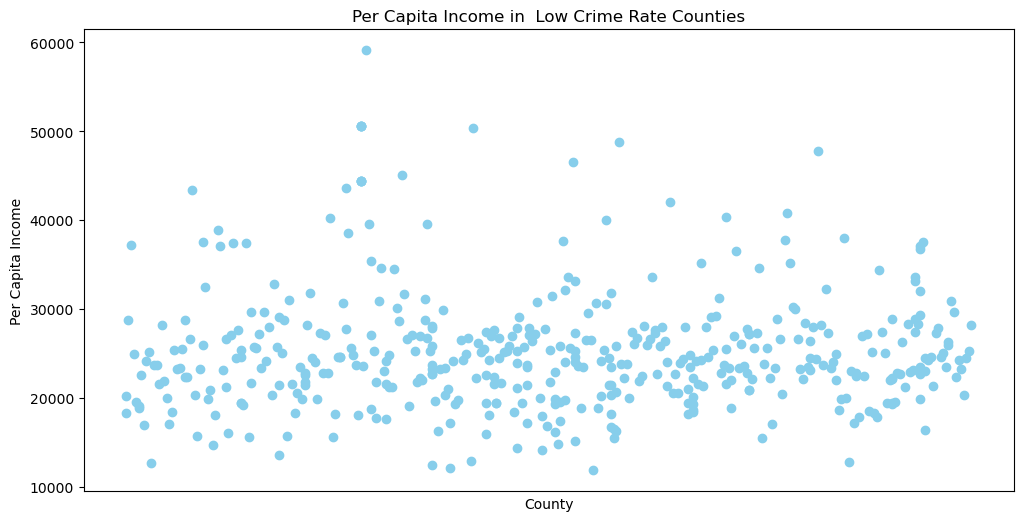

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Define "low" crime rate as the lower third of the distribution
low_crime_rate_threshold = final_data['county crime rate'].quantile(0.2)
# Filter the dataset for counties with a "low" crime rate
low_crime_rate_data = final_data[final_data['county crime rate'] <= low_crime_rate_threshold]
# Plotting for Approach 1
plt.figure(figsize=(12, 6))
plt.scatter(low_crime_rate_data['COUNTY'], low_crime_rate_data['per capita income'], color='skyblue')
plt.xlabel('County')
plt.ylabel('Per Capita Income')
plt.title('Per Capita Income in  Low Crime Rate Counties')
plt.xticks(rotation=45)
plt.xticks([])
plt.show()

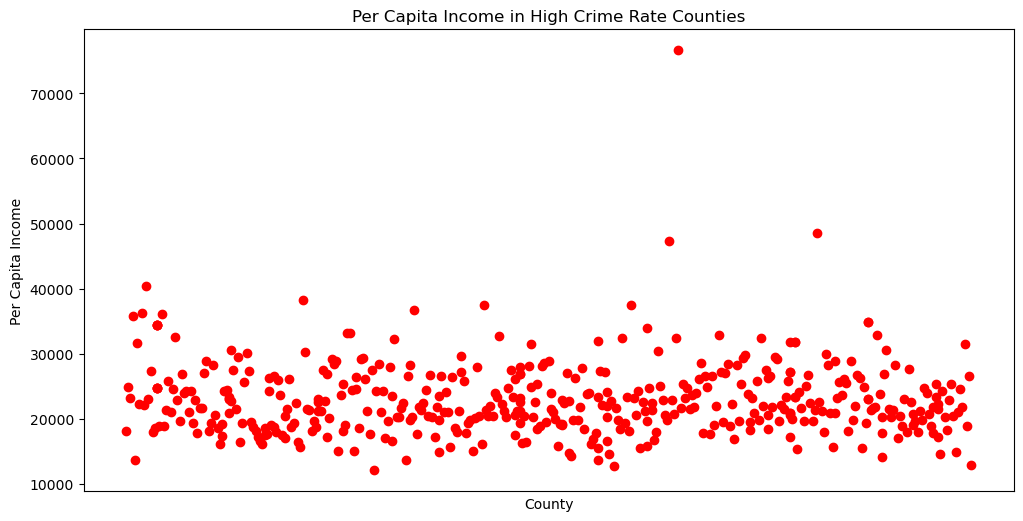

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Define "high" crime rate as the upper 90th percentile of the distribution
high_crime_rate_threshold = final_data['county crime rate'].quantile(0.8)
# Filter the dataset for counties with a "high" crime rate
high_crime_rate_data = final_data[final_data['county crime rate'] >= high_crime_rate_threshold]
plt.figure(figsize=(12, 6))
plt.scatter(high_crime_rate_data['COUNTY'], high_crime_rate_data['per capita income'], color='red')
plt.xlabel('County')
plt.ylabel('Per Capita Income')
plt.title('Per Capita Income in High Crime Rate Counties')
plt.xticks(rotation=45)
plt.xticks([])
plt.show()

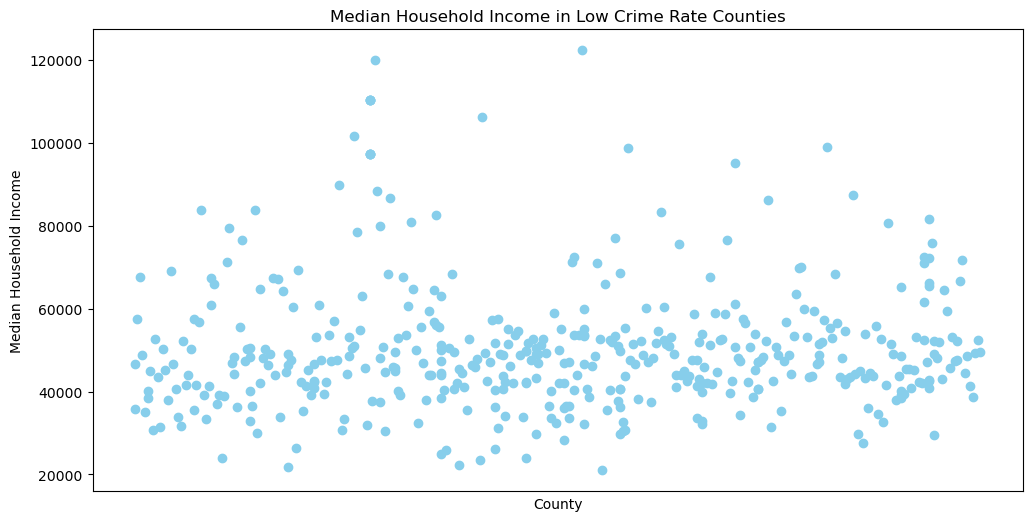

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define "low" crime rate as the lower 10th percentile of the distribution
low_crime_rate_threshold = final_data['county crime rate'].quantile(0.2)

# Filter the dataset for counties with a "low" crime rate
low_crime_rate_data = final_data[final_data['county crime rate'] <= low_crime_rate_threshold]

# Plotting with a focus on Median Household Income in Low Crime Rate Counties
plt.figure(figsize=(12, 6))
plt.scatter(low_crime_rate_data['COUNTY'], low_crime_rate_data['median household income'], color='skyblue')
plt.xlabel('County')
plt.ylabel('Median Household Income')
plt.title('Median Household Income in Low Crime Rate Counties')
plt.xticks([])  # Removes all labels from the x-axis
plt.show()

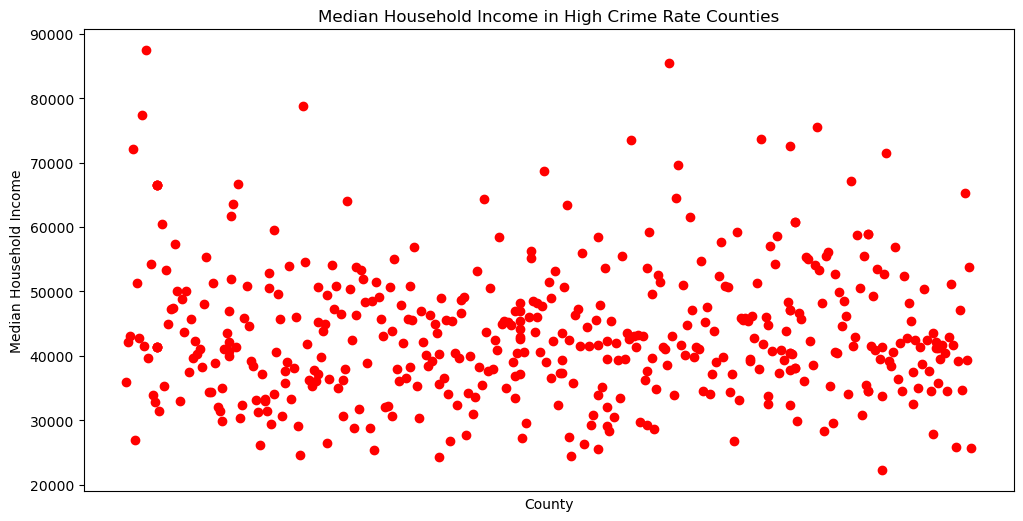

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Define "high" crime rate as the upper 90th percentile of the distribution
high_crime_rate_threshold = final_data['county crime rate'].quantile(0.8)
# Filter the dataset for counties with a "high" crime rate
high_crime_rate_data = final_data[final_data['county crime rate'] >= high_crime_rate_threshold]
# Plotting with a focus on Median Household Income
plt.figure(figsize=(12, 6))
plt.scatter(high_crime_rate_data['COUNTY'], high_crime_rate_data['median household income'], color='red')
plt.xlabel('County')
plt.ylabel('Median Household Income')
plt.title('Median Household Income in High Crime Rate Counties')
plt.xticks([])  # Removes all labels from the x-axis
plt.show()

## Visualizing the new Datasets

#### Using the same method as before, I wanted to see if the unemployment rate could influence a county's crime rate. So, in the first plot below, I looked at the unemployment rates in counties with similar crime rates. In the second plot, I simply show the trend of all counties' crime rates alongside their unemployment rates to more convincingly support my assumption.

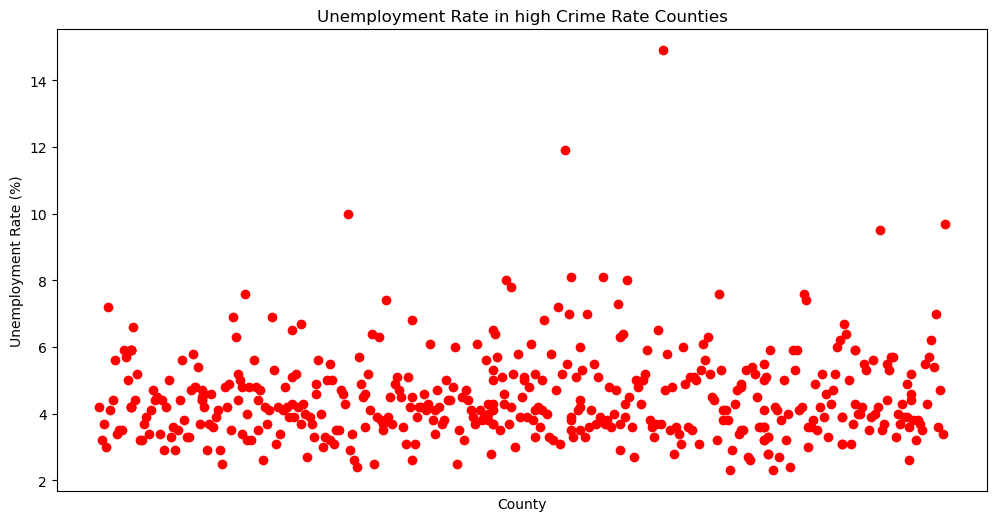

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Define "high" crime rate as the lower 10th percentile of the distribution
high_crime_rate_threshold = final_data['county crime rate'].quantile(0.8)
# Filter the dataset for counties with a "high" crime rate
high_crime_rate_data = final_data[final_data['county crime rate'] >= high_crime_rate_threshold]
# Plotting with a focus on Unemployment Rate in high Crime Rate Counties
plt.figure(figsize=(12, 6))
plt.scatter(high_crime_rate_data['COUNTY'], high_crime_rate_data['unemployment rate'], color='red')
plt.xlabel('County')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in high Crime Rate Counties')
plt.xticks([])  # Removes all labels from the x-axis
plt.show()

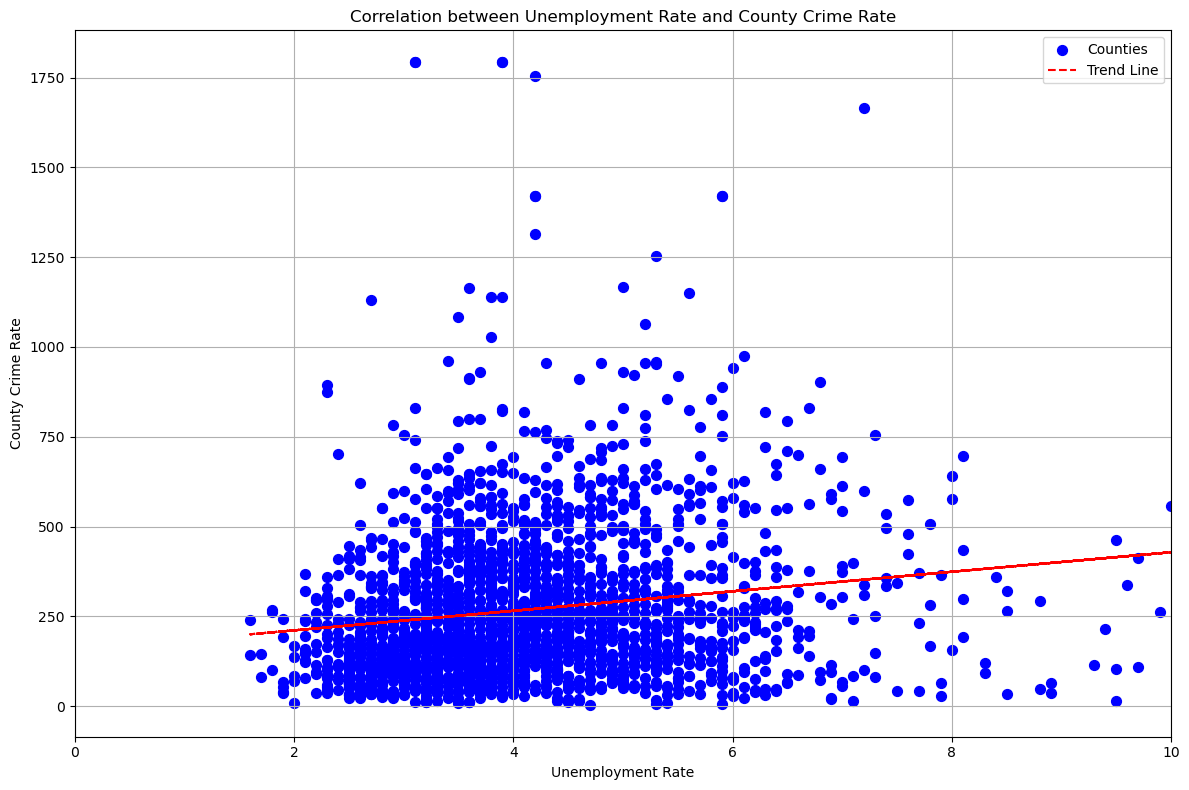

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(
    final_data['unemployment rate'],
    final_data['county crime rate'],
    color='blue', s=50, label='Counties'
)
z = np.polyfit(
    final_data['unemployment rate'],
    final_data['county crime rate'], 1
)
p = np.poly1d(z)
plt.plot(
    final_data['unemployment rate'],
    p(final_data['unemployment rate']),
    "r--", label='Trend Line'
)
plt.title('Correlation between Unemployment Rate and County Crime Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('County Crime Rate')
plt.xlim(0,10)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# OLS Regression

#### First, I made two scatter plots to observe the trend between PTR (pupil-teacher ratio) and the county crime rate, which will help me prepare for my regression analysis. First one has a controler I merged before (unemployment rate). Second one does not have a controler. The point in the plot all are counties. From the two plots below, I noticed a linear trend. However, I also observed a downward U curve, suggesting the need for a non-linear regression (X^2). These plots provide me with a perspective for creating regression tables.

#### Base on the economic tuition, non-linear relationship makes more sense due to if we want to decrease crime ratea lot , we cannot just always improve the educational quality. We can use the concept of diminishing returns, a well-known economic theory o explain . This theory suggests that after a certain point, each additional unit of input (in this case, investment in education) yields less and less output (reduction in local crime rates). At first, increasing educational quality might greatly reduce crime rates, but over time, the amount of crime reduction gained from each additional improvement becomes smaller. This shows that although enhancing education is beneficial, relying solely on this approach without other supportive measures may not always be effective.

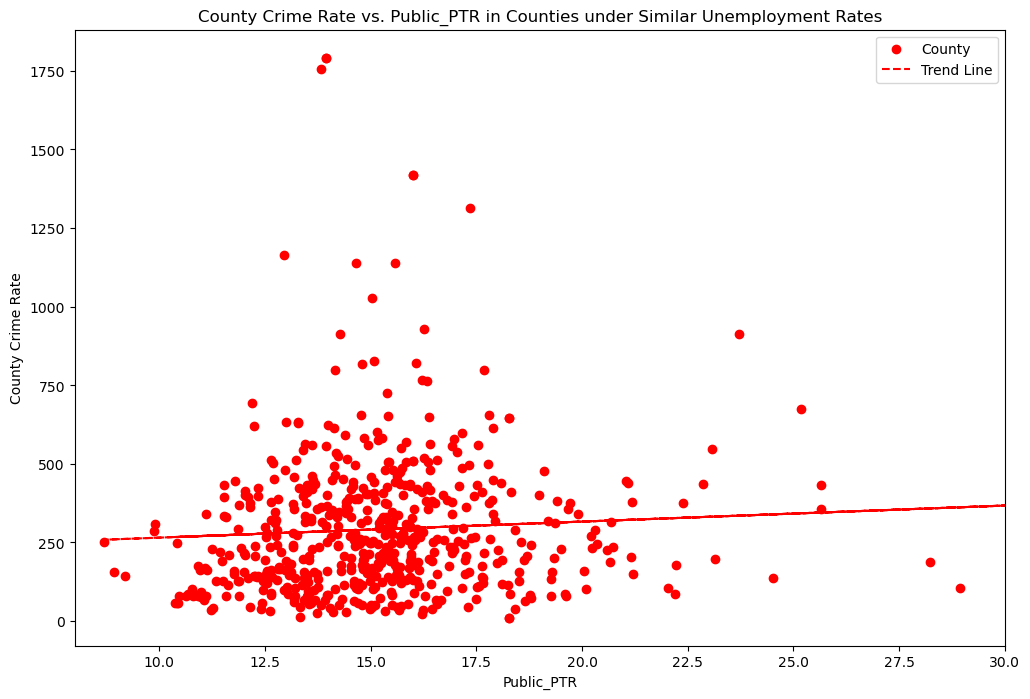

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Define similar unemployment rate thresholds
top_unemployment_rate_threshold = final_data['unemployment rate'].quantile(0.6)
low_unemployment_rate_threshold = final_data['unemployment rate'].quantile(0.4)

# Filter for counties under similar unemployment rates
unemployment_rate_data = final_data[(final_data['unemployment rate'] >= low_unemployment_rate_threshold) & 
                                    (final_data['unemployment rate'] <= top_unemployment_rate_threshold)]

# Plotting
plt.figure(figsize=(12, 8))
# Ensure labels are assigned within the plotting commands
plt.scatter(unemployment_rate_data['Public_PTR'], unemployment_rate_data['county crime rate'], color='red', label='County')

# Adding a trend line
z = np.polyfit(unemployment_rate_data['Public_PTR'], unemployment_rate_data['county crime rate'], 1)
p = np.poly1d(z)
plt.plot(unemployment_rate_data['Public_PTR'], p(unemployment_rate_data['Public_PTR']), "r--", label='Trend Line')

plt.xlabel('Public_PTR')
plt.ylabel('County Crime Rate')
plt.xlim(8, 30)  
plt.title('County Crime Rate vs. Public_PTR in Counties under Similar Unemployment Rates')
plt.legend()  
plt.show()

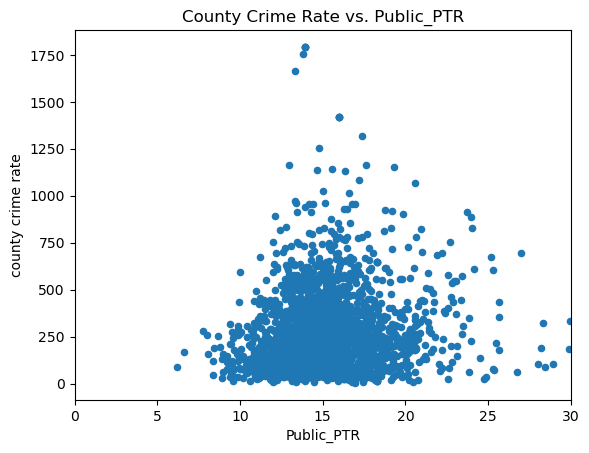

In [27]:
final_data.plot(x='Public_PTR', y='county crime rate', kind='scatter')
plt.xlim(0,30)
plt.title('County Crime Rate vs. Public_PTR')
plt.show()

### Reasons for choosing these X and Y:

The dependent variable (Y) is the crime rate in each county, which shows the safety of each county is. This is in my research topic. It's important to study this because understanding the factors that affect crime rates can help improve everyone's well-being and local economy. 

The independent variables (X) I've chosen include:

Public_PTR and Private_PTR: These stand for the pupil-teacher ratios in public and private schools, respectively. I set them as indicator of educational quality. I want to evaluate the impact of increasing PTR on crime rate. The theory here is that better educational environments can lead to lower crime rates. By comparing public and private schools, we can see which  has a stronger influence on reducing crime. They still in my topic. 

Income per capita: This variable is a control in our regression. The reason for choosing this is that higher income levels can reduce crime rates, particularly non-fatal crimes like theft.

Median household income: This variable helps us compare counties with similar economic statuses. The choosing reason idea is  counties with lower median household incomes often experience higher crime rates.

Unemployment rate: This is my another control variable. The choosing reason is that higher unemployment rates can lead to higher crime rates.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

#### m1 and m2 is linear regression with no fixed effect.

m1 fucntion: $$
{CrimeRate}_i = \beta_0 + \beta_1 {Private PTR}_i + + \beta_2 {Public PTR}_i+ u_i
$$

In [16]:
# add constant
final_data['const'] = 1
# Define the dependent variable (Y) as 'county crime rate'
Y = final_data['county crime rate']
# Define the independent variables (X)
X = final_data[['const','Private_PTR', 'Public_PTR']]
# Fitting the OLS regression model with both linear and quadratic terms
m1 = sm.OLS(Y, X, missing = 'drop').fit()

m2 fucntion: $$
{CrimeRate}_i = \beta_0 + \beta_1 {Private PTR}_i + + \beta_2 {Public PTR}_i+ \beta_3 {UnemploymentrRate}_i 
+ \beta_4 {Per Capita Income}_i + \beta_5 {Median Household Income}_i+ u_i
$$

In [17]:
# add constant
final_data['const'] = 1
# Define the dependent variable (Y) as 'county crime rate'
Y = final_data['county crime rate']
# Define the independent variables (X)
X = final_data[[ 'const','Private_PTR', 'Public_PTR',
                'unemployment rate','per capita income', 'median household income']]
# Fitting the OLS regression model with both linear and quadratic terms
m2 = sm.OLS(Y, X, missing = 'drop').fit()

#### m3 and m4 are non_linear regression (X^2) with no fixed effect 

In [18]:
# add constant
final_data['const'] = 1
# Generate the squared terms for the 'Public_PTR' and 'Private_PTR' variables
final_data['Public_PTR_squared'] = final_data['Public_PTR'] ** (2)
final_data['Private_PTR_squared'] = final_data['Private_PTR'] ** (2)
# Generate the squared terms for the 'Public_PTR' and 'Private_PTR' variables
state_dummies = pd.get_dummies(final_data['STATE'], drop_first=True)
state_dummies = state_dummies.astype(int)
Y = final_data['county crime rate']

m3 function: 
$$
{CrimeRate}_i = \beta_0 + \beta_1 {PrivatePTR}_i + \beta_2 {PublicPTR}_i + \beta_3 {PrivatePTR_i}^2 + \beta_4 {PublicPTR_i}^2 + u_i
$$

In [19]:
# Define the dependent variable (Y) as 'county crime rate'
Y = final_data['county crime rate']
# Define the independent variables (X), including both the original and squared terms
X = final_data[['const','Public_PTR_squared','Public_PTR', 'Private_PTR','Private_PTR_squared']]
# Fitting the OLS regression model with both linear and quadratic terms
m3 = sm.OLS(Y, X, missing = 'drop').fit()

m4 function: 
$$
{CrimeRate}_i = \beta_0 + \beta_1 {PrivatePTR}_i + \beta_2 {PublicPTR}_i + \beta_3 {PrivatePTR_i}^2 + \beta_4 {PublicPTR_i}^2 + \beta_5 {UnemploymentRate}_i + \beta_6 {PerCapitaIncome}_i + \beta_7 {MedianHouseholdIncome}_i + u_i
$$

In [20]:
# Define the dependent variable (Y) as 'county crime rate'
Y = final_data['county crime rate']
# Define the independent variables (X), including both the original and squared terms
X = final_data[['const','Public_PTR_squared','Public_PTR', 'Private_PTR','Private_PTR_squared',
                'unemployment rate','per capita income', 'median household income']]
# Fitting the OLS regression model with both linear and quadratic terms
m4 = sm.OLS(Y, X, missing = 'drop').fit()

#### all regression models below are non_linear regression(X^2) with dummy variables .  Writing all of their function is not clear.So, I just write my preferred regression model:
$$
{CrimeRate}_i = \beta_0 + \beta_1 {PrivatePTR}_i + \beta_2 {PublicPTR}_i + \beta_3 {PrivatePTR_i}^2 + \beta_4 {PublicPTR_i}^2 + \beta_5 {UnemploymentRate}_i + \beta_6 {PerCapitaIncome}_i + \beta_7 {MedianHouseholdIncome}_i +\gamma_s + u_i
$$

In [21]:
X_squared = pd.concat([
    final_data[['const','Private_PTR', 'Public_PTR', 'Private_PTR_squared', 
                'Public_PTR_squared']],
    state_dummies], axis=1)
X_squared = sm.add_constant(X_squared)
# Fit the OLS model with quadratic transformations
m6 = sm.OLS(Y, X_squared).fit()

In [22]:
X_squared = pd.concat([
    final_data[['const','Public_PTR', 'Public_PTR_squared', 
                'unemployment rate','per capita income', 'median household income']],
    state_dummies], axis=1)
X_squared = sm.add_constant(X_squared)
# Fitting the OLS regression model with both linear and quadratic terms
m7 = sm.OLS(Y, X_squared, missing = 'drop').fit()

In [23]:
X_squared = pd.concat([
    final_data[['const','Private_PTR', 'Private_PTR_squared',
                'unemployment rate','per capita income', 'median household income']],
    state_dummies], axis=1)
X_squared = sm.add_constant(X_squared)
# Fitting the OLS regression model with both linear and quadratic terms
m8 = sm.OLS(Y, X_squared, missing = 'drop').fit()

In [24]:
# Including original PTR variables alongside their squared transformations
X_squared = pd.concat([
    final_data[['const','Private_PTR', 'Public_PTR', 'Private_PTR_squared', 
                'Public_PTR_squared', 'unemployment rate']],
    state_dummies], axis=1)
X_squared = sm.add_constant(X_squared)
# Fit the OLS model with quadratic transformations
m9 = sm.OLS(Y, X_squared).fit()

In [25]:
# Generate the squared terms for the 'Public_PTR' and 'Private_PTR' variables
final_data['Public_PTR_squared'] = final_data['Public_PTR'] ** (2)
final_data['Private_PTR_squared'] = final_data['Private_PTR'] ** (2)
# Generate the squared terms for the 'Public_PTR' and 'Private_PTR' variables
state_dummies = pd.get_dummies(final_data['STATE'], drop_first=True)
state_dummies = state_dummies.astype(int)
# Including original PTR variables alongside their squared transformations
X_squared = pd.concat([
    final_data[['const','Private_PTR', 'Public_PTR', 'Private_PTR_squared', 
                'Public_PTR_squared', 'unemployment rate','per capita income', 'median household income']],
    state_dummies], axis=1)
X_squared = sm.add_constant(X_squared)
Y = final_data['county crime rate']
# Fit the OLS model with quadratic transformations
m5 = sm.OLS(Y, X_squared).fit()

In [26]:
! pip install stargazer

  Using cached stargazer-0.0.7-py3-none-any.whl.metadata (6.3 kB)
Using cached stargazer-0.0.7-py3-none-any.whl (15 kB)


In [27]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
stargazer = Stargazer([m1, m3, m2, m4])
stargazer.add_line('dummies', ['No', 'No','No','No'])
HTML(stargazer.render_html())

I run these four models (this first regression table) for two reasons. First is to compare non_linear regression model to figure out which type of regression is better. Second is linear relationship is my original assumption. And non-linear regression is based on economic theory( diminishing marginal return) and the fact from my data plots. From the table, we can clearly see that the R^2 value is better in the non-linear models, which indicates a better fit. More importantly, the coefficients for both types of PTR (pupil-teacher ratio) in the non-linear regression are much improved compared to the linear regression. Also, the p-value for Private_PTR in the non-linear regression is significant, unlike in the linear regression, suggesting that it is a reliable factor in this model.

In [28]:
stargazer = Stargazer([m4, m5, m3, m6])
stargazer.covariate_order(['const','Private_PTR', 'Public_PTR', 'Private_PTR_squared', 'Public_PTR_squared',
                           'unemployment rate','per capita income', 'median household income'])
stargazer.add_line('dummies', ['No', 'Yes','No','Yes'])
HTML(stargazer.render_html())

For this regression table above (table 2), I compared models with dummy variables to those without. Looking at their coefficients, R^2, and p-values, you can see that the coefficient of PTR in models with dummies is much larger and more reasonable than in models without dummies (38.317 > 21.617; 14.306 > 7.680). This better fits my research topic. Moreover, there is a significant increase in R^2, indicating that the model with dummies fits the real-world data better.

In [29]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
stargazer = Stargazer([m5, m6, m7, m8, m9])
stargazer.covariate_order(['const','Private_PTR', 'Public_PTR', 'Private_PTR_squared', 'Public_PTR_squared',
                           'unemployment rate','per capita income', 'median household income'])
stargazer.add_line('dummies', ['Yes', 'Yes','Yes','Yes','Yes'])
HTML(stargazer.render_html())

The purpose of creating this third table(the table above) is to find the best regression model after determining that kind of models with dummy variables perform better. We then started comparing. The first model in the table includes all my independent variables (X). Compared to the second model, which has no control variables, the first model is more comprehensive. The third model drops the Private PTR, and the fourth model drops the Public PTR. This helps us see which type of PTR has a bigger impact on reducing crime rates. The fifth model includes only one controler: the unemployment rate to avoid multicollinearity issues. After comparing these five models by examining the rationality of the X variables' coefficients, their adjusted R^2, and p-values; my preferred model is the first one. This model seems to provide the most accurate and reasonable explanation of the data.

### Preferred Regression

My preferred regression:
$$
\begin{align*}
{CrimeRate}_i = & \ (-65.718) \
+ (14.306) \times {PrivatePTR}_i \
+ (38.317) \times {PublicPTR}_i \
+ (-0.402) \times {PrivatePTR_i}^2 \
+ (-0.647) \times {PublicPTR_i}^2 \
+ (12.150) \times {UnemploymentRate}_i \
+ (0.013) \times {PerCapitaIncome}_i \
+ (-0.008) \times {MedianHouseholdIncome}_i \
&
\end{align*}
$$

Based on the compare of three regression tables; the interpretation I wrote; higher R^2; better p-value and the logical, reasonable coefficients. I chose column (1) in table 3.  

Intrepretation for logical coefficients: the high positive coefficients for public and private PTR suggest that improving educational quality (by decreasing PTR) can significantly reduce crime rates. However, you can see the negative coefficient for PTR squared. This is due to 'diminishing marginal returns'. This means we can't keep lowering PTR to reduce the crime rate to zero—it's not feasible. When increase X to a point, Y will start to decrease instead of increase. Additionally, the positive coefficients for unemployment rate is easy to explain. As many would expect, this factor can significantly impact crime rates. Regarding the small negative coefficient for median household income, I believe it's because thefts often target wealthier people, leading to a slight increase in crime rates in richer areas. However, increase household income generally  lower crime rate as well because people are less likely to commit crimes when they are financially secure. This balance results in a very small negative coefficient. The logic is similar for per capita income.Therefore, both of their coefficient is small. 

### Objective Function

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left(Y_i - \hat{Y}_i \right)^2
$$

$$
\hat{Y}_i =\begin{align*}
& \ (-65.718) \
+ (14.306) \times {PrivatePTR}_i \
+ (38.317) \times {PublicPTR}_i \
+ (-0.402) \times {PrivatePTR_i}^2 \
+ (-0.647) \times {PublicPTR_i}^2 \
+ (12.150) \times {UnemploymentRate}_i \
+ (0.013) \times {PerCapitaIncome}_i \
+ (-0.008) \times {MedianHouseholdIncome}_i \
&
\end{align*}
$$

n is the number of observations in my regression. $Y_i$ is the observed value of the dependent variable for the $i^{th}$ observation (county crime rate). $\hat{Y}_i$ is the predicted value of the dependent variable for the $i^{th}$ observation, calculated using my regression model. 

# Machine Learning

In [32]:
# Generate the squared terms for the 'Public_PTR' and 'Private_PTR' variables
final_data['Public_PTR_squared'] = final_data['Public_PTR'] ** (2)
final_data['Private_PTR_squared'] = final_data['Private_PTR'] ** (2)
# Generate the squared terms for the 'Public_PTR' and 'Private_PTR' variables
state_dummies = pd.get_dummies(final_data['STATE'], drop_first=True)
state_dummies = state_dummies.astype(int)
# Including original PTR variables alongside their squared transformations
X1 = pd.concat([
    final_data[['const','Private_PTR', 'Public_PTR', 'Private_PTR_squared', 
                'Public_PTR_squared', 'unemployment rate','per capita income', 'median household income']],
    state_dummies], axis=1)
Y = final_data['county crime rate']
# Fit the OLS model with quadratic transformations
m = sm.OLS(Y, X1).fit()

In [15]:
# add constant
final_data['const'] = 1
# Generate the squared terms for the 'Public_PTR' and 'Private_PTR' variables
final_data['Public_PTR_squared'] = final_data['Public_PTR'] ** (2)
final_data['Private_PTR_squared'] = final_data['Private_PTR'] ** (2)
# Define the dependent variable (Y) as 'county crime rate'
Y = final_data['county crime rate']
# Define the independent variables (X), including both the original and squared terms
X = final_data[['const','Public_PTR_squared','Public_PTR', 'Private_PTR','Private_PTR_squared',
                'unemployment rate','per capita income', 'median household income']]
# Fitting the OLS regression model with both linear and quadratic terms
M = sm.OLS(Y, X, missing = 'drop').fit()

In [18]:
from sklearn import tree
sqft_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,Y)
# use the fitted tree to predict
y_pred_tree = sqft_tree.predict(X)
# find the error of prediction (MSE)
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(Y, y_pred_tree))

Mean Squared Error: 40554.229457765025


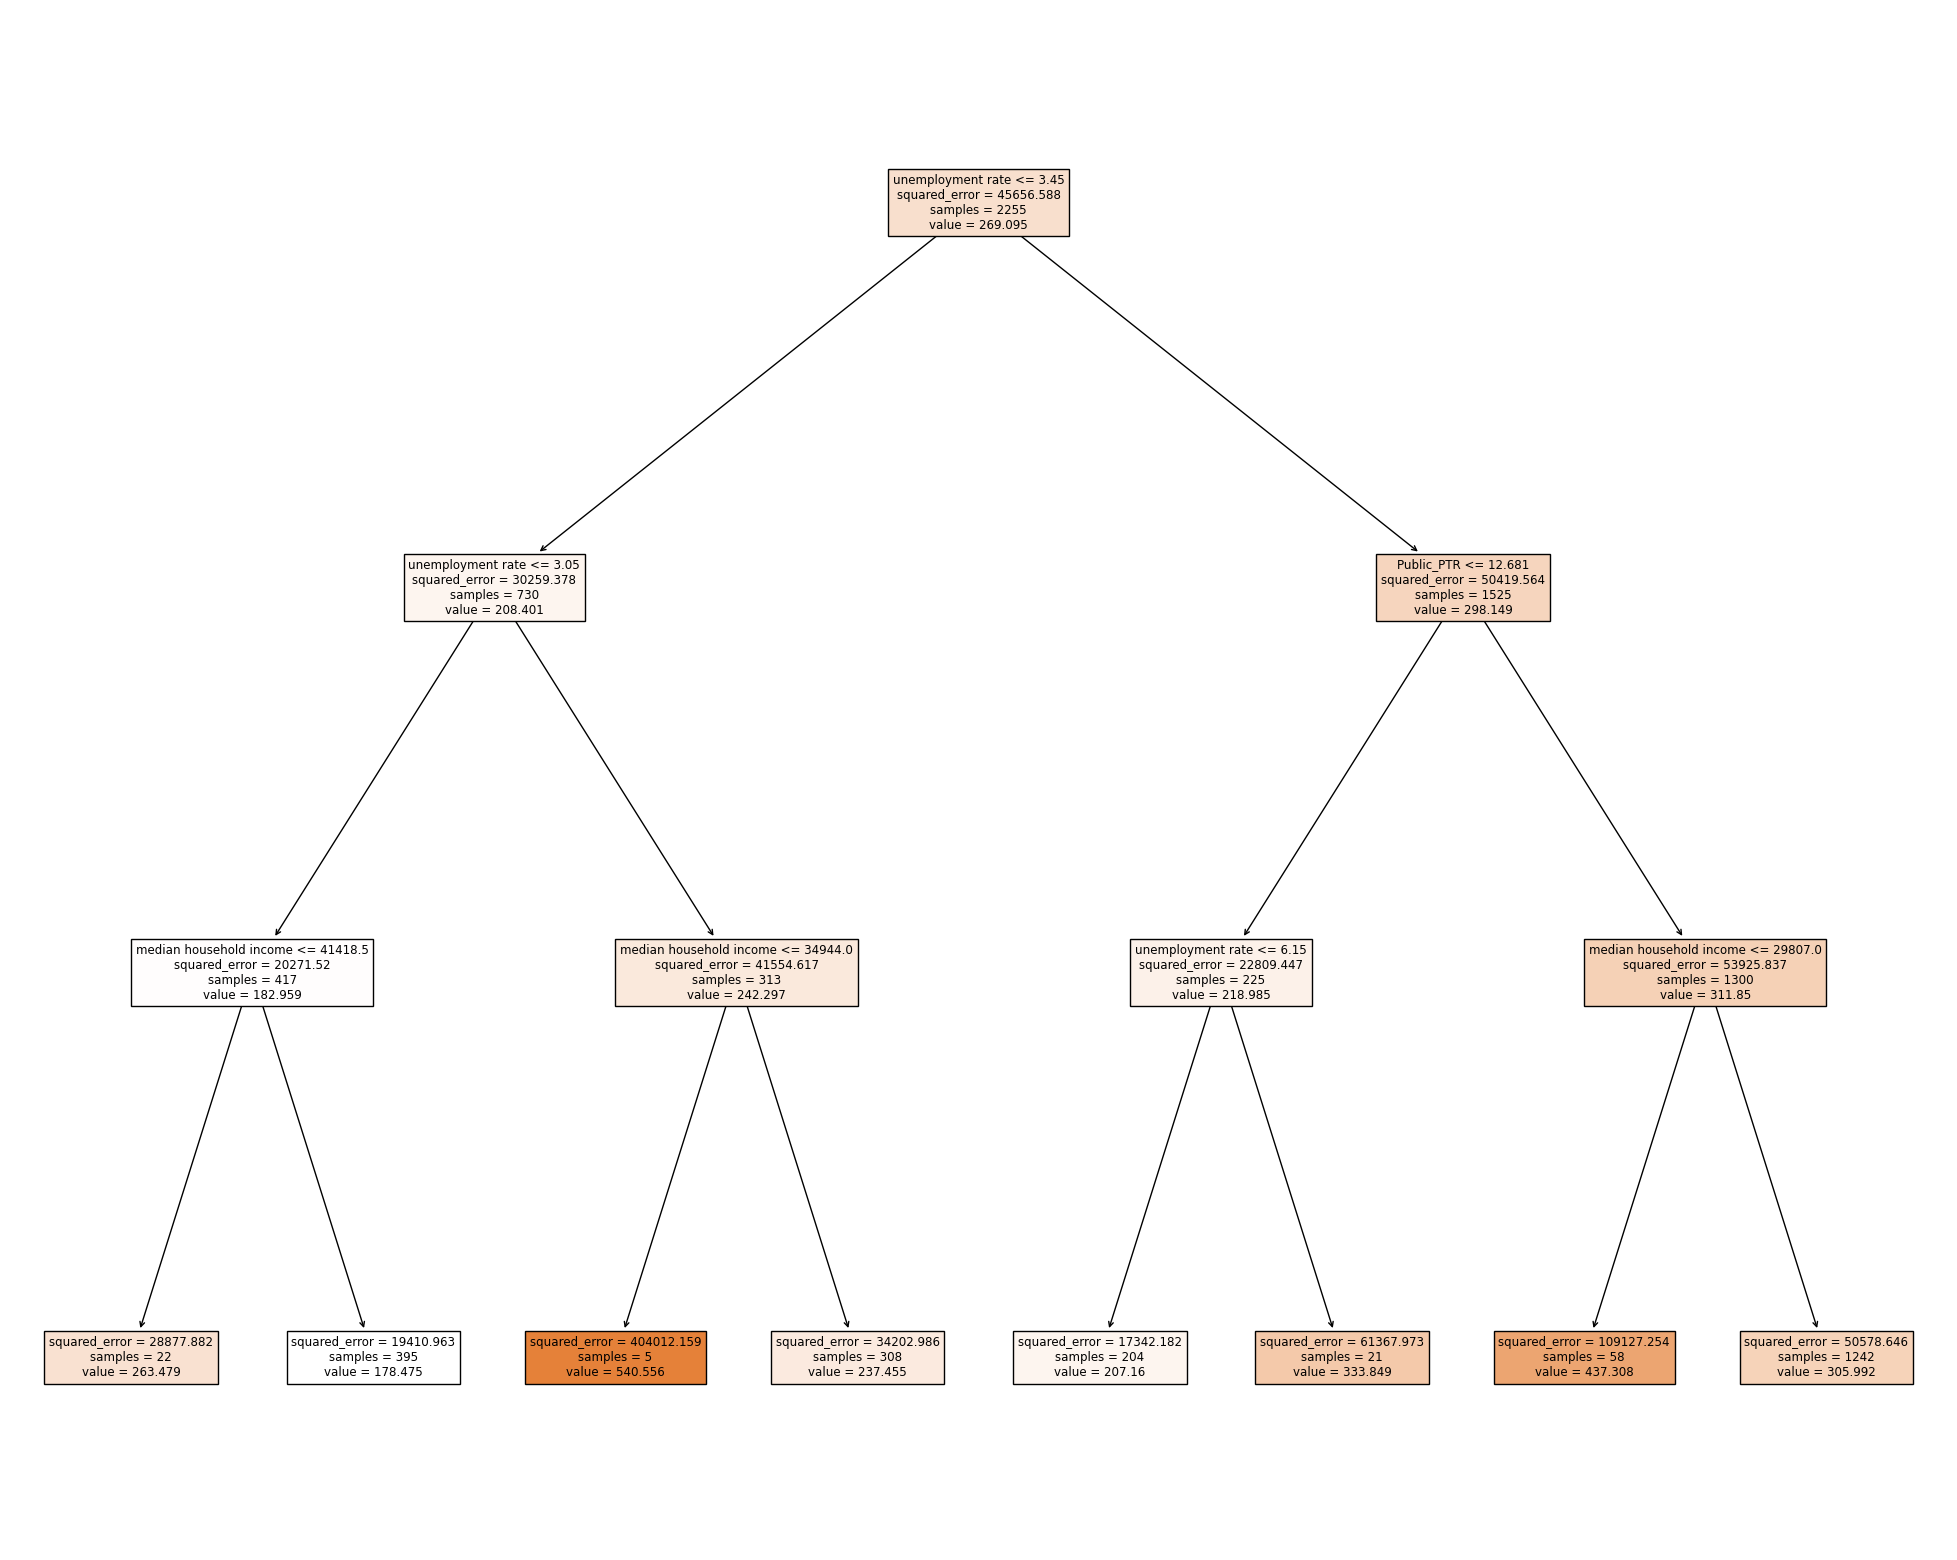

In [35]:
sqrf_fig = plt.figure(figsize=(25,20))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True)

### Objective Function for Regression Tree

$$
\text{Minimize} \ J(X, t) = \frac{1}{N_{left}} \sum_{i \in I_{left}(t)} (y_i - \hat{y}{left})^2 + \frac{1}{N{right}} \sum_{i \in I_{right}(t)} (y_i - \hat{y}_{right})^2
$$

J(X,t) is the objective function based on the input features X and a threshold t. 

X is predictor independent variables: 'Public_PTR', 'Private_PTR', 'Public_PTR_squared', 'Private_PTR_squared', 'unemployment rate', 'per capita income', 'median household income'. 

t is the threshold value for splitting the data based on one of the independent variables(X).

N left and N right are the number of observations in the left and right subsets created by the tree split. 

y left and y right are respectively the predicted average values for the 'county crime rate' in the left and right subsets after the split.

$y_i$is the actual value of the dependent variable (in this case, 'county crime rate') for the $i^{th}$observation.

For my Decision Tree Regressor with max_depth=3, the primary regularization parameter I am using is the maximum depth of the tree. Max Depth (max_depth): The maximum depth of the tree. A deeper tree can capture more complex patterns but might lead to overfitting. Limiting the depth can simplify the model, acting as a form of regularization.


In [19]:
y_pred_linear = M.predict(X)
# Calculating MSE for the Linear Regression model
mse_linear = metrics.mean_squared_error(Y, y_pred_linear)
# Printing the MSE for comparison
print('Decision Tree Mean Squared Error:', metrics.mean_squared_error(Y, y_pred_tree))
print('Linear Regression Mean Squared Error:', mse_linear)
# Calculating additional comparison metrics
# MAE
mae_tree = metrics.mean_absolute_error(Y, y_pred_tree)
mae_linear = metrics.mean_absolute_error(Y, y_pred_linear)
# RMSE
rmse_tree = np.sqrt(metrics.mean_squared_error(Y, y_pred_tree))
rmse_linear = np.sqrt(mse_linear)
# R-squared
r2_tree = metrics.r2_score(Y, y_pred_tree)
r2_linear = metrics.r2_score(Y, y_pred_linear)
# Printing the additional metrics
print(f"Decision Tree - MAE: {mae_tree}, RMSE: {rmse_tree}, R²: {r2_tree}")
print(f"Linear Regression - MAE: {mae_linear}, RMSE: {rmse_linear}, R²: {r2_linear}")

Decision Tree Mean Squared Error: 40554.229457765025
Linear Regression Mean Squared Error: 41988.147529867405
Decision Tree - MAE: 144.79123792727154, RMSE: 201.38080707397373, R²: 0.11175514496241379
Linear Regression - MAE: 147.24567965752246, RMSE: 204.9100962126254, R²: 0.08034854774382261


## Random Forest Model 

In [21]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
# define and fit
regr_RF = RandomForestRegressor(max_features=5, random_state=1).fit(X, Y)
#predict
pred = regr_RF.predict(X)
#calculate MSE
mean_squared_error(Y, pred)

8532.770630708634

### Importance Matrix

The plot below shows a ranking of our variables (Xs) based on how much they help us lower errors and make our model better. We can see that the importance of median household income, per capita income, and unemployment rate is higher than the pupil-teacher ratio (PTR). As we know, these factors can greatly reduce crime rates. However, PTR still has a big impact on crime rates compare to these factors, which supports my research topic. This shows we can try to improve the quality of education to help lower future local crime rates. Addtionally, the plot shows that improving public schools can have a better effect on reducing crime rates than private schools. This phenomenom is another thing I want to research.

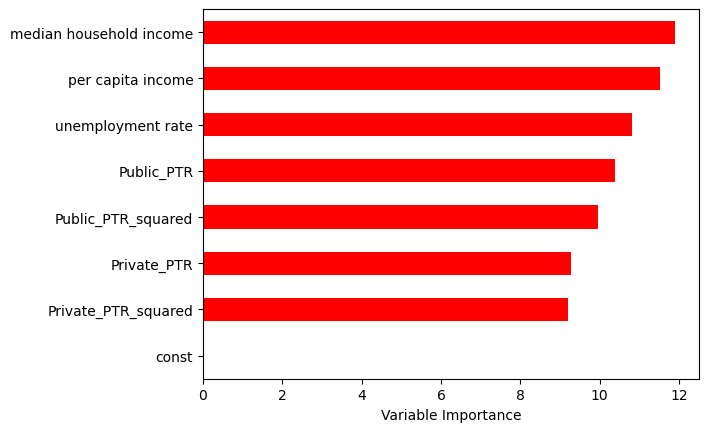

In [63]:
Importance = pd.DataFrame({'Importance':regr_RF.feature_importances_*100}, index=X1.columns)
features_of_interest = ['Private_PTR', 'Public_PTR', 'Private_PTR_squared', 
                'Public_PTR_squared', 'unemployment rate','per capita income', 'median household income','const']  
# Filter the Importance DataFrame to include only the features of interest
Importance_filtered = Importance.loc[features_of_interest]
Importance_filtered.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## Conclusion

As we wrap up this study, we've journeyed through the complex world of education quality and crime rates across the US, armed with insights and data that go beyond what we typically see. Despite the challenges of not having all the data we wished for, focusing on states has led us to discover important patterns and connections, enriching our understanding of the ties between public safety and education(McCall et al., 2012).

Through the meticulous juxtaposition of crime rates with factors like school types, student-to-school ratios, and economic indicators, a comprehensive narrative has emerged. It speaks to the profound impact of educational environments and investments on societal welfare. The diligent application of web scraping techniques has further enriched our analysis, allowing us to draw from a well of data that sheds light on the financial commitments to education across states.

The visual representations and maps crafted in this study not only illustrate the statistical findings but also tell a story of potential and promise(Murray & Swatt, 2010). They reveal a landscape where the alignment of educational quality with lower crime rates is more than conjecture—it is a visible trend that underscores the importance of nurturing our educational systems.

To sum it up, the data we've collected supports the idea that the quality of education has a real impact on public safety. This study highlights the vital role that investing in education and thoughtful policy-making play in building better communities. Looking ahead, it's crucial for those in charge, from lawmakers to educators and community leaders, to take these insights seriously and work towards enhancing education as a key to a healthier, safer society. This is not the end but rather a stepping stone for more research and efforts to create a more educated and safer world(Ramirez et al., 2011).

### <span style="color:blue">Reference
Burdick-Will, J. (2013). School Violent Crime and Academic Achievement in Chicago. Sociology of Education, 86(4), 343–361. https://doi.org/10.1177/0038040713494225
    
Cook, Philip J., Gottfredson, Denise C., & Na, C. (2010). School Crime Control and Prevention. Crime and Justice, 39(1), 313–440. https://doi.org/10.1086/652387

McCall, P. L., Land, K. C., Dollar, C. B., & Parker, K. F. (2012). The Age Structure-Crime Rate Relationship: Solving a Long-Standing Puzzle. Journal of Quantitative Criminology, 29(2), 167–190. https://doi.org/10.1007/s10940-012-9175-9
 
Murray, R. K., & Swatt, M. L. (2010). Disaggregating the Relationship Between Schools and Crime. Crime & Delinquency, 59(2), 163–190. https://doi.org/10.1177/0011128709348438
    
Ramirez, M., Ferrer, R. R., Cheng, G., Cavanaugh, J. E., & Peek‐Asa, C. (2011). Violation of School Behavioral Policies and Its Relationship with Overall Crime. Annals of Epidemiology, 21(3), 214–220. https://doi.org/10.1016/j.annepidem.2010.06.010